# Introduction

Welcome to the hands-on Colab notebook for TabPFN!
This code shows how to locally (with GPU support) install and run TabPFN. For fast inference with additional features use **[TabPFN client](https://tinyurl.com/tabpfn-colab-online)**.

**Installation**
* First, copy the notebook to be able to modify it.
* Then, run the cells in the installation block, this should
be good enough!

---

> 🔵 **Hint** <br>
We recommend first enabling the **Table of Contents** with the `☰` icon in the top left and collapsing all sections by selecting all cells `Ctrl + Shift + A` and then pressing `Ctrl + ]`.

---

Thank you to [Lennart Purucker](https://github.com/LennartPurucker) for providing the original version of this notebook!

# Installation

Restart your runtime and rerun the *cell*, if Colab asks for it.

In [48]:
# # Install sklearn
# !pip install scikit-learn==1.5.2

# # Install TabPFN
# !pip install tabpfn

# # TabPFN Community installs optional functionalities around the TabPFN model
# # These include post-hoc ensembles, interpretability tools, and more
# !git clone https://github.com/PriorLabs/tabpfn-community
# !pip install -e tabpfn-community[post_hoc_ensembles,interpretability,hpo]

# # Install Baselines
# !pip install catboost xgboost

# # Install example datasets
# !pip install datasets

fatal: destination path 'tabpfn-community' already exists and is not an empty directory.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Obtaining file:///root/tabpfn-community
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tabpfn-community (pyproject.toml) ... done
  Created wheel for tabpfn-community: filename=tabpfn_community-0.0.4-0.editable-py3-none-any.whl size=11201 sha256=cbcc85d64e1894b8b4bcf4524e0a588c9dab53ef72197219b6602660d0e8e01d
  Stored in directory: /tmp/pip-ephem-wheel-cache-681ff5fa/wheels/e3/13/1e/fbe09a85704c5eee2b358e359f0ca204b7acb6f2a8c0d567fd
Successfully built tabpfn-community
  Attempting uninstall: tabpfn-community
    Found existing installation: tabpfn-community 0.0.4
    Uninstalling tabpfn-community-0.0.4:
      Successfully uninstalled tabpfn-community-0.0.4


In [50]:
# !git clone https://github.com/PriorLabs/tabpfn-extensions
# !pip install -e tabpfn-extensions[post_hoc_ensembles,interpretability,hpo]


fatal: destination path 'tabpfn-extensions' already exists and is not an empty directory.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Obtaining file:///root/tabpfn-extensions
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tabpfn-community (pyproject.toml) ... done
  Created wheel for tabpfn-community: filename=tabpfn_community-0.0.4-0.editable-py3-none-any.whl size=11220 sha256=ce3b85071ea134a5b0b959f5e3beac24d9c6a3f9dfdbf5603c70898353c0d58a
  Stored in directory: /tmp/pip-ephem-wheel-cache-zwqgpxx1/wheels/6c/9a/3b/960ecee6b7ca62b985a150e69414e7377f31e6790c5844db19
Successfully built tabpfn-community
  Attempting uninstall: tabpfn-community
    Found existing installation: tabpfn-community 0.0.4
    Uninstalling tabpfn-community-0.0.4:
      Successfully uninstalled tabpfn-community-0.0.4


**Now Restart the Runtime**

# Necessary Imports for the Notebook

The examples in this notebook require the following imports.
Make sure to run this cell before any other cell.




### In order to get the fastest predictions you need to enable GPUs for the notebook:
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

In [3]:
import os
# 导入os模块，该模块提供了一种方便的使用操作系统相关功能的方式，
# 例如文件和目录操作、环境变量管理等，但在这段代码中暂时未使用

# Setup Imports
import pandas as pd
# 导入pandas库并将其重命名为pd，pandas是一个强大的数据处理和分析库，
# 常用于数据读取、清洗、转换和分析等操作

import numpy as np
# 导入numpy库并将其重命名为np，numpy是Python中用于科学计算的基础库，
# 提供了高性能的多维数组对象和处理这些数组的工具

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
# 从sklearn（Scikit-learn）库的datasets模块中导入特定的数据集加载函数，
# load_breast_cancer用于加载乳腺癌数据集，load_diabetes用于加载糖尿病数据集，
# load_iris用于加载鸢尾花数据集

from sklearn.model_selection import train_test_split
# 从sklearn的model_selection模块中导入train_test_split函数，
# 该函数用于将数据集划分为训练集和测试集

from sklearn.model_selection import cross_val_score
# 从sklearn的model_selection模块中导入cross_val_score函数，
# 该函数用于进行交叉验证并返回交叉验证的得分

from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
# 从sklearn的metrics模块中导入多个评估指标函数，
# accuracy_score用于计算分类模型的准确率，
# mean_absolute_error用于计算回归模型的平均绝对误差，
# mean_squared_error用于计算回归模型的均方误差，
# root_mean_squared_error用于计算回归模型的均方根误差，
# r2_score用于计算回归模型的决定系数，
# roc_auc_score用于计算分类模型的ROC曲线下面积

from sklearn.model_selection import train_test_split
# 重复导入train_test_split函数，此处导入多余，可以删除

import matplotlib.pyplot as plt
# 导入matplotlib库的pyplot模块并将其重命名为plt，
# matplotlib是一个用于创建可视化图表的库，pyplot提供了类似于MATLAB的绘图接口

from matplotlib.colors import ListedColormap
# 从matplotlib的colors模块中导入ListedColormap类，
# 该类用于创建自定义的颜色映射

from sklearn.inspection import DecisionBoundaryDisplay
# 从sklearn的inspection模块中导入DecisionBoundaryDisplay类，
# 该类用于可视化分类模型的决策边界

from sklearn.datasets import fetch_openml
# 从sklearn的datasets模块中导入fetch_openml函数，
# 该函数用于从OpenML平台下载数据集

from sklearn.preprocessing import LabelEncoder
# 从sklearn的preprocessing模块中导入LabelEncoder类，
# 该类用于将分类标签编码为整数

from IPython.display import display, Markdown, Latex
# 从IPython的display模块中导入display、Markdown和Latex函数，
# display用于在Jupyter Notebook中显示对象，
# Markdown用于显示Markdown格式的文本，
# Latex用于显示LaTeX格式的数学公式

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
# 从xgboost库中导入XGBClassifier和XGBRegressor类，
# XGBClassifier用于分类任务，XGBRegressor用于回归任务，
# xgboost是一个高效的梯度提升库

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# 从sklearn的ensemble模块中导入RandomForestClassifier和RandomForestRegressor类，
# RandomForestClassifier用于分类任务，RandomForestRegressor用于回归任务，
# 随机森林是一种集成学习方法

from catboost import CatBoostClassifier, CatBoostRegressor
# 从catboost库中导入CatBoostClassifier和CatBoostRegressor类，
# CatBoostClassifier用于分类任务，CatBoostRegressor用于回归任务，
# CatBoost是一个处理类别特征的梯度提升库

import torch
# 导入torch库，torch是一个深度学习框架，提供了张量计算和自动求导功能

from tabpfn import TabPFNClassifier, TabPFNRegressor
# 从tabpfn库中导入TabPFNClassifier和TabPFNRegressor类，
# TabPFNClassifier用于分类任务，TabPFNRegressor用于回归任务

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')
# 检查当前环境是否支持CUDA（NVIDIA GPU加速），
# 如果不支持，则抛出SystemError异常并提示用户启用GPU以进行快速训练

In [42]:

import subprocess
# 导入 subprocess 模块，该模块允许你生成新的进程，连接到它们的输入/输出/错误管道，
# 并获取它们的返回码。这里主要用于执行外部的 shell 命令。

import os
# 导入 os 模块，该模块提供了一种使用操作系统相关功能的便捷方式，
# 这里主要用于操作环境变量。

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
# 使用 subprocess.run() 函数执行一个 shell 命令。
# 具体命令为 'bash -c "source /etc/network_turbo && env | grep proxy"'：
#   - 'bash -c' 表示使用 bash 解释器来执行后面的命令。
#   - 'source /etc/network_turbo' 是执行 /etc/network_turbo 脚本，通常这个脚本会设置一些环境变量，
#     比如网络代理相关的变量。
#   - 'env | grep proxy' 是列出当前所有的环境变量，并过滤出包含 'proxy' 的环境变量。
# shell=True 表示通过 shell 来执行命令。
# capture_output=True 表示捕获命令的标准输出和标准错误输出。
# text=True 表示以文本模式处理输出，返回的结果是字符串类型。
# 执行结果存储在 result 变量中，它是一个 CompletedProcess 对象。

output = result.stdout
# 从 CompletedProcess 对象 result 中提取标准输出内容，存储在 output 变量中。

for line in output.splitlines():
    # 使用 splitlines() 方法将 output 字符串按行分割成一个列表，
    # 然后遍历这个列表，每次取出一行内容进行处理。

    if '=' in line:
        # 检查当前行是否包含等号 '='，因为环境变量通常的格式是 '变量名=变量值'。

        var, value = line.split('=', 1)
        # 如果包含等号，使用 split('=', 1) 方法将当前行按等号分割成两部分，
        # 第一部分赋值给 var 变量，作为环境变量的名称；
        # 第二部分赋值给 value 变量，作为环境变量的值。
        # 这里的参数 1 表示只分割一次。

        os.environ[var] = value
        # 使用 os.environ 字典来操作环境变量，将 var 作为键，value 作为值，
        # 添加或更新到当前 Python 进程的环境变量中。

In [4]:
import sys
import torch

# 打印 Python 版本
print(f"当前 Python 版本: {sys.version}")

# 检查是否安装了 PyTorch 以及是否支持 CUDA
try:
    if torch.cuda.is_available():
        # 打印 CUDA 版本
        print(f"当前 CUDA 版本: {torch.version.cuda}")
    else:
        print("CUDA 不可用，可能未安装或配置 CUDA 环境。")
except ImportError:
    print("未安装 PyTorch，无法获取 CUDA 版本信息。")

当前 Python 版本: 3.10.8 (main, Nov 24 2022, 14:13:03) [GCC 11.2.0]
当前 CUDA 版本: 11.8


# Predicting with TabPFN

For our first example, we will use the client to predict on [toy data from scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

## Classification

We now compare the classification performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure classification performance using [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). These toy datasets are simple to solve, so the ROC AUC will be very high.

In [5]:
# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
# 从OpenML平台获取帕金森病数据集，用于预测是否患有帕金森病
# 特征为语音测量值（如频率、振幅等），共有195个样本
df = fetch_openml('parkinsons')

# Alternative datasets (commented for reference):
# 以下是一些可供选择的其他数据集，为了参考而注释掉

# German Credit Fraud (ID: 31)
# Samples: 1,000
# Features: 20 (account info, credit history, employment)
# Target: Good/Bad credit risk
# df = fetch_openml(data_id=31)
# 德国信用欺诈数据集，有1000个样本，20个特征（账户信息、信用历史、就业情况等）
# 目标是判断信用风险是好还是坏

# Cholesterol dataset: Predict cholesterol levels
# Features: Patient characteristics, medical measurements
# Samples: 303 patients
# Target: Cholesterol levels in mg/dl
# df = fetch_openml('cholesterol', version=2, as_frame=True)
# 胆固醇数据集，用于预测胆固醇水平
# 特征为患者特征和医学测量值，有303个患者样本
# 目标是预测胆固醇水平（单位：mg/dl）

# Primary Tumor dataset: Predict tumor type and size
# Features: Patient symptoms, medical test results
# Samples: 339 patients
# Target: Tumor classification and size
# df = fetch_openml('primary-tumor', version=1, as_frame=True) - too many classes!
# 原发性肿瘤数据集，用于预测肿瘤类型和大小
# 特征为患者症状和医学检查结果，有339个患者样本
# 目标是对肿瘤进行分类和确定大小，但该数据集类别过多

# Heart Disease dataset (Statlog): Predict presence of heart disease
# Features: Clinical and test measurements
# Samples: 270 patients
# Target: Binary heart disease diagnosis
# df = fetch_openml("heart-statlog", version=1)
# 心脏病数据集（Statlog），用于预测是否患有心脏病
# 特征为临床和测试测量值，有270个患者样本
# 目标是进行心脏病的二元诊断

# Diabetes dataset: Predict diabetes presence
# Features: Medical measurements, patient history
# Samples: 768 patients
# Target: Binary diabetes diagnosis
#df = fetch_openml("diabetes", version=1)
# 糖尿病数据集，用于预测是否患有糖尿病
# 特征为医学测量值和患者病史，有768个患者样本
# 目标是进行糖尿病的二元诊断

# Hypothyroid dataset: Predict thyroid condition
# Features: Blood test results, patient symptoms
# Samples: 3772 patients
# Target: Thyroid condition classification
# df = fetch_openml('hypothyroid')
# 甲状腺功能减退数据集，用于预测甲状腺状况
# 特征为血液检测结果和患者症状，有3772个患者样本
# 目标是对甲状腺状况进行分类

# 从获取的数据集中分离特征数据和目标数据
# X 存储特征数据，y 存储目标数据
X, y = df.data, df.target

# Encode target labels to classes
# 创建一个 LabelEncoder 对象，用于将目标标签编码为整数
le = LabelEncoder()
# 使用 LabelEncoder 对目标标签进行拟合和转换
# 拟合是指学习标签的编码规则，转换是指将标签按照规则转换为整数
y = le.fit_transform(y)

# Convert all categorical columns to numeric
# 遍历特征数据 X 中数据类型为 'category' 的列
for col in X.select_dtypes(['category']).columns:
    # 将分类列中的类别转换为对应的整数编码
    X[col] = X[col].cat.codes

# 使用 train_test_split 函数将数据集划分为训练集和测试集
# test_size=0.33 表示测试集占总数据集的 33%
# random_state=42 用于设置随机种子，保证每次划分结果一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [6]:
# Print dataset description
# 在 Jupyter Notebook 中显示数据集的描述信息
# df['DESCR'] 存储了数据集的详细描述，使用 Markdown 格式显示
display(Markdown(df['DESCR']))

**Author**:   
**Source**: UCI
**Please cite**: 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007) 

* Abstract: 

Oxford Parkinson's Disease Detection Dataset

* Source:

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

* Data Set Information:
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

Further details are contained in the following reference -- if you use this dataset, please cite: 
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).


* Attribute Information:

Matrix column entries (attributes): 
name - ASCII subject name and recording number 
MDVP:Fo(Hz) - Average vocal fundamental frequency 
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 
NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures 
DFA - Signal fractal scaling exponent 
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

Downloaded from openml.org.

In [7]:
# 在 Jupyter Notebook 中显示特征数据 X
display(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [8]:
# 在 Jupyter Notebook 中显示结果变量
display(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# 这行代码调用 sklearn 库中的 train_test_split 函数，将数据集划分为训练集和测试集。
# train_test_split 函数接收多个参数，下面是对各部分的详细解释：
# - X: 这是一个特征矩阵，包含了用于训练和预测的所有特征数据。例如在一个预测房价的任务中，X 可能包含房屋面积、房间数量、房龄等特征。
# - y: 这是目标变量向量，也就是每个样本对应的真实标签或目标值。比如在房价预测中，y 就是每一套房子对应的实际价格。
# - test_size=0.20: 这个参数指定了测试集在整个数据集中所占的比例，这里设置为 0.20 意味着会将 20% 的数据划分到测试集中，剩下 80% 作为训练集。
# - random_state=6: 随机数种子，用于保证每次运行代码时数据集的划分结果是一致的。在机器学习实验中，为了保证结果的可重复性，通常会设置一个固定的随机数种子。
# 函数返回四个对象，分别是训练集的特征矩阵 X_train、测试集的特征矩阵 X_test、训练集的目标变量向量 y_train 和测试集的目标变量向量 y_test。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

# 这部分注释表明接下来的代码是用于训练和评估 TabPFN 模型。
# TabPFN（Tabular Probability Forest Network）是一种用于表格数据的概率预测模型。

# 这里创建了一个 TabPFNClassifier 类的实例，并设置随机数种子为 42。
# 随机数种子的作用和上面 train_test_split 中的类似，保证模型训练过程中的随机性是可复现的。
# 接着使用 .fit(X_train, y_train) 方法对模型进行训练。fit 方法会根据训练集的特征矩阵 X_train 和对应的目标变量向量 y_train 来学习特征和标签之间的关系，调整模型的参数。
# 最后使用 .predict_proba(X_test) 方法对测试集进行预测。predict_proba 方法会返回每个样本属于各个类别的概率，结果存储在 y_pred 中。y_pred 是一个二维数组，每一行对应一个测试样本，每一列对应一个类别，元素值表示该样本属于对应类别的概率。
y_pred = TabPFNClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)

# 这行注释表明下面的代码是用于计算 ROC AUC（Receiver Operating Characteristic Area Under the Curve）分数，该指标可以同时处理二分类和多分类问题。
# ROC AUC 是衡量分类模型性能的一个常用指标，它表示模型在不同分类阈值下的性能表现，取值范围在 0 到 1 之间，越接近 1 表示模型性能越好。

# len(np.unique(y)) > 2 这部分代码用于判断当前的分类任务是多分类还是二分类。
# np.unique(y) 函数会返回目标变量向量 y 中所有不重复的值，len(np.unique(y)) 则是这些不重复值的数量，也就是分类的类别数。
# 如果类别数大于 2，说明是多分类任务，此时直接使用 y_pred 来计算 ROC AUC 分数；
# 如果类别数等于 2，说明是二分类任务，在二分类情况下，roc_auc_score 函数通常只需要正类的概率，所以这里取 y_pred 的第二列（索引为 1）作为预测概率。
# roc_auc_score 函数接收两个参数，第一个是真实的目标变量向量 y_test，第二个是预测的概率值，根据任务类型选择合适的输入，最终计算出 ROC AUC 分数并存储在变量 score 中。
score = roc_auc_score(y_test, y_pred if len(np.unique(y)) > 2 else y_pred[:, 1])

# 这行代码使用 f-string 格式化字符串的方式打印出 TabPFN 模型的 ROC AUC 分数。
# :.4f 表示将分数保留四位小数输出，这样可以让结果更加清晰易读。
print(f"TabPFN ROC AUC: {score:.4f}")

TabPFN ROC AUC: 0.9556


In [15]:
# 打印y_pred的前10个数据
print("y_pred的前10个数据:", y_pred[:10])

y_pred的前10个数据: [[1.3189982e-03 9.9868101e-01]
 [2.6915467e-03 9.9730849e-01]
 [2.9983493e-02 9.7001654e-01]
 [1.8053530e-02 9.8194647e-01]
 [2.5021635e-02 9.7497839e-01]
 [7.6495926e-04 9.9923503e-01]
 [1.9045061e-02 9.8095495e-01]
 [5.2092568e-04 9.9947906e-01]
 [1.9064754e-02 9.8093522e-01]
 [1.7301474e-02 9.8269856e-01]]


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

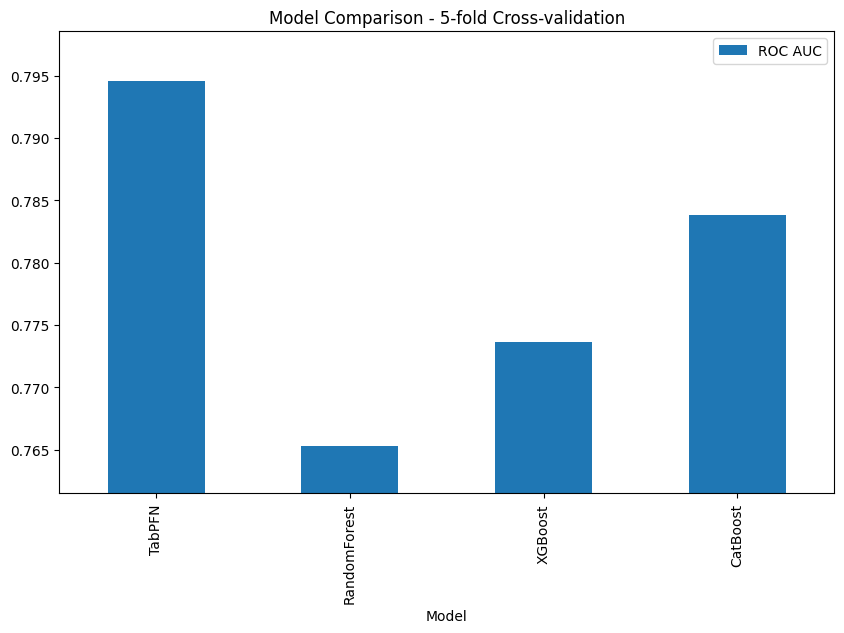

In [16]:
# 比较不同的机器学习模型，通过在数据的不同部分上多次训练每个模型，
# 并对它们的性能得分进行平均，以获得更可靠的性能估计
# 以下开始定义要比较的机器学习模型列表
# 定义模型
models = [
    # 模型名称为 'TabPFN'，对应的模型实例是 TabPFNClassifier，设置随机种子为 42 以保证结果可复现
    ('TabPFN', TabPFNClassifier(random_state=42)),
    # 模型名称为 'RandomForest'，对应的模型实例是 RandomForestClassifier，设置随机种子为 42 以保证结果可复现
    ('RandomForest', RandomForestClassifier(random_state=42)),
    # 模型名称为 'XGBoost'，对应的模型实例是 XGBClassifier，设置随机种子为 42 以保证结果可复现
    ('XGBoost', XGBClassifier(random_state=42)),
    # 模型名称为 'CatBoost'，对应的模型实例是 CatBoostClassifier，设置随机种子为 42 以保证结果可复现，
    # verbose=0 表示训练过程中不输出详细信息
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# 计算得分
# 根据标签 y 中不同类别的数量来确定使用的评分指标
# 如果标签 y 中不同类别的数量大于 2，即多分类问题，使用 'roc_auc_ovr'（One-vs-Rest ROC AUC）作为评分指标
# 否则，使用 'roc_auc' 作为评分指标
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
# 初始化一个字典 scores 来存储每个模型的平均交叉验证得分
# 遍历 models 列表中的每个模型，使用 cross_val_score 函数进行 5 折交叉验证
# cross_val_score 函数会将数据集 X 和标签 y 划分为 5 个不同的部分，对每个部分进行一次训练和验证
# scoring 参数指定使用前面确定的评分指标，n_jobs=1 表示使用 1 个 CPU 核心进行计算，verbose=1 表示输出详细信息
# 最后使用 .mean() 计算 5 次验证得分的平均值，将模型名称作为键，平均得分作为值存储在 scores 字典中
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=10, verbose=1).mean()
          for name, model in models}


# 绘制结果
# 将 scores 字典中的键值对转换为列表，创建一个 DataFrame，列名为 'Model' 和 'ROC AUC'
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
# 使用 DataFrame 的 plot 方法绘制柱状图，x 轴为 'Model'，y 轴为 'ROC AUC'，图形大小为 (10, 6)
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
# 设置 y 轴的范围，下限为最小得分的 0.995 倍，上限为最小（1.0 和最大得分的 1.005 倍）
ax.set_ylim(df['ROC AUC'].min() * 0.995, min(1.0, df['ROC AUC'].max() * 1.005))
# 设置图形的标题为 'Model Comparison - 5-fold Cross-validation'
ax.set_title('Model Comparison - 5-fold Cross-validation')

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [43]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier
# 从tabpfn_extensions库的post_hoc_ensembles模块的sklearn_interface子模块中导入AutoTabPFNClassifier类，
# 该类用于进行后处理集成，可提升TabPFN的性能。

import numpy as np  # 导入numpy库，用于数值计算
from sklearn.datasets import load_breast_cancer  # 从sklearn的datasets模块中导入load_breast_cancer函数，用于加载乳腺癌数据集
from sklearn.model_selection import train_test_split  # 从sklearn的model_selection模块中导入train_test_split函数，用于划分训练集和测试集
from sklearn.metrics import accuracy_score, roc_auc_score  # 从sklearn的metrics模块中导入accuracy_score和roc_auc_score函数，用于计算准确率和ROC AUC得分

# Binary
X, y = load_breast_cancer(return_X_y=True)
# 调用load_breast_cancer函数加载乳腺癌数据集，return_X_y=True表示只返回数据特征X和标签y。

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
# 使用train_test_split函数将数据集划分为训练集和测试集，test_size=0.33表示测试集占总数据的33%，
# random_state=42是随机数种子，保证每次划分结果相同，方便复现实验。

clf = AutoTabPFNClassifier(max_time=30) 
# 初始化AutoTabPFNClassifier分类器，max_time=30表示集成过程的最大运行时间为30秒，
# 通常来说，更长的集成时间会带来更好的结果。

clf.fit(X_train, y_train)
# 使用训练数据X_train和对应的标签y_train对分类器进行训练。

prediction_probabilities = clf.predict_proba(X_test)
# 调用分类器的predict_proba方法对测试数据X_test进行预测，得到每个样本属于各个类别的概率。

predictions = np.argmax(prediction_probabilities, axis=-1)
# 使用numpy的argmax函数，沿着最后一个轴（axis=-1）找出预测概率最大的类别索引，作为最终的预测标签。

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
# 计算并打印ROC AUC得分，通过比较测试集标签y_test和预测概率的第二列（因为是二分类问题，第二列表示正类的概率）得到。

print("Accuracy", accuracy_score(y_test, predictions))
# 计算并打印准确率，通过比较测试集标签y_test和预测标签predictions得到。

2025-02-17 19:56:38 INFO     Using `default` preset for Post Hoc Ensemble.
2025-02-17 19:56:38 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-02-17 19:56:38 INFO     Using task type: binary_classification
2025-02-17 19:56:38 INFO     Obtaining TabPFN models from a random portfolio.
2025-02-17 19:56:43 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_tabpfn_model_13', 'random_rf_pfn_model_14', 'random_rf_pfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_rf_pfn_model_18', 'random_tabpfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_rf

tabpfn-v2-classifier-od3j1g5m.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 19:56:56 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-od3j1g5m.ckpt
2025-02-17 19:56:59 INFO     Yield data for model random_rf_pfn_model_2 and split 0 (repeat=1).
2025-02-17 19:57:59 INFO     Time limit reached.
2025-02-17 19:57:59 INFO     Stop validation of all models after 3 models in repeat 1.
2025-02-17 19:57:59 INFO     As this is the first repeat, we trim down the models to all so-far run models!
2025-02-17 19:58:00 INFO     Order of selections: [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2]
2025-02-17 19:58:00 INFO     Val loss over iterations: [-0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.999732905982906, -0.9997

ROC AUC: 0.9975329961761441
Accuracy 0.9787234042553191


## Regression

We now compare the regression performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure regression performance using [Root Mean Squared Error](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_error.html).

In [53]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s
# 从OpenML平台获取波士顿住房数据集，该数据集用于回归任务，即预测房屋价格
# 特征包含邻里特征和住房属性，共有506个邻里样本
# 目标是预测房屋的中位价值，单位为千美元
df = fetch_openml(data_id=531, as_frame=True)

# Alternative datasets (commented for reference):
# 以下是一些可供选择的其他数据集，为了参考而注释掉

# Liver Disorders dataset
# Classification task: Predict liver disorder presence
# Features: Blood test results, alcohol consumption
# Samples: 345 patients
# Target: Binary liver disorder diagnosis
# df = fetch_openml("liver-disorders", version=1)
# 肝脏疾病数据集，用于分类任务，即预测是否存在肝脏疾病
# 特征包含血液检测结果和酒精摄入量，共有345个患者样本
# 目标是进行肝脏疾病的二元诊断

# Grid Stability dataset
# Regression task: Predict electrical grid stability
# Features: Power system measurements, grid parameters
# Samples: 10,000 simulations
# Target: Grid stability score
#df = fetch_openml(data_id=44973, as_frame=True)
# 电网稳定性数据集，用于回归任务，即预测电网的稳定性
# 特征包含电力系统测量值和电网参数，共有10000个模拟样本
# 目标是预测电网的稳定性得分

# Concrete Compressive Strength dataset
# Regression task: Predict concrete strength
# Features: Concrete components (cement, water, aggregates)
# Samples: 1,030 concrete samples
# Target: Compressive strength in MPa
#df = fetch_openml(data_id=44959, as_frame=True)
# 混凝土抗压强度数据集，用于回归任务，即预测混凝土的强度
# 特征包含混凝土的组成成分（水泥、水、骨料等），共有1030个混凝土样本
# 目标是预测混凝土的抗压强度，单位为兆帕

# 从获取的数据集中分离特征数据和目标数据
# X 存储特征数据，y 存储目标数据
X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
# 遍历特征数据 X 中数据类型为 'object' 或 'category' 的列
for col in X.select_dtypes(['object', 'category']).columns:
    # 使用 pd.factorize() 函数将分类列转换为整数编码
    # pd.factorize() 函数返回一个元组，第一个元素是编码后的整数数组，第二个元素是唯一值的索引
    # 这里取元组的第一个元素，即编码后的整数数组
    X[col] = pd.factorize(X[col])[0]  

# 使用 train_test_split 函数将数据集划分为训练集和测试集
# test_size=0.33 表示测试集占总数据集的 33%
# random_state=42 用于设置随机种子，保证每次划分结果一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
# 在 Jupyter Notebook 中显示数据集的描述信息
# df['DESCR'] 存储了数据集的详细描述，使用 Markdown 格式显示
display(Markdown(df['DESCR']))

# 在 Jupyter Notebook 中显示特征数据 X
display(X)

/tmp/ipykernel_1177/1537432340.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.factorize(X[col])[0]


**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's


Information about the dataset
CLASSTYPE: numeric
CLASSINDEX: last

Downloaded from openml.org.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,1,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,1,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,2,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,2,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,0,273.0,21.0,393.45,6.48


In [54]:
# Train and evaluate TabPFN
# 注释说明这部分代码的作用是训练并评估 TabPFN 回归模型
reg = TabPFNRegressor(random_state=42)
# 创建一个 TabPFNRegressor 回归模型的实例
# TabPFNRegressor 是 TabPFN 库中用于回归任务的模型类
# random_state=42 是设置随机种子，确保模型的初始化和训练过程具有可重复性
# 相同的随机种子可以使得每次运行代码时，模型的初始化参数和随机过程的结果一致

reg.fit(X_train, y_train)
# 调用模型的 fit 方法对模型进行训练
# X_train 是训练集的特征数据，包含了用于训练模型的各种特征
# y_train 是训练集的目标数据，即我们希望模型学习预测的真实值
# 模型会根据 X_train 和 y_train 之间的关系进行学习，调整自身的参数以拟合训练数据

y_pred = reg.predict(X_test)
# 调用训练好的模型的 predict 方法对测试集进行预测
# X_test 是测试集的特征数据，模型会根据之前学习到的规律，对 X_test 对应的目标值进行预测
# 预测结果存储在 y_pred 变量中

# Calculate Variance Explained (R2 Score)
# 注释说明这部分代码原本的意图可能是计算方差解释率（R2 分数），但实际计算的是均方根误差
score = root_mean_squared_error(y_test, y_pred)
# 使用 root_mean_squared_error 函数计算模型预测结果的均方根误差（RMSE）
# y_test 是测试集的真实目标值
# y_pred 是模型对测试集的预测值
# 均方根误差衡量了预测值与真实值之间的平均误差程度，其值越小表示模型的预测效果越好

print(f"TabPFN RMSE: {score:.4f}")
# 使用格式化字符串输出 TabPFN 模型的均方根误差
# {score:.4f} 表示将 score 的值保留四位小数输出
# 这样可以清晰地看到模型在测试集上的预测误差情况

TabPFN RMSE: 2.6068


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

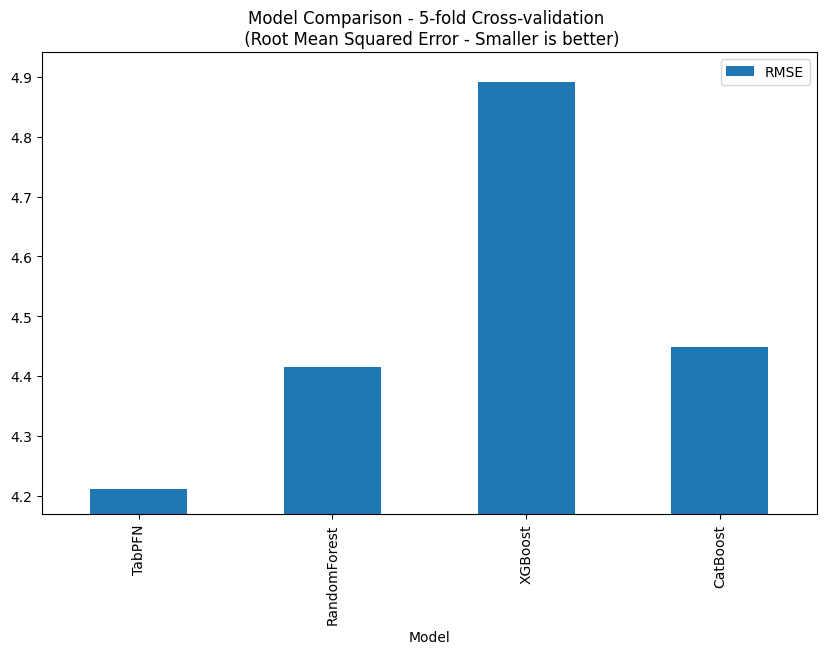

In [55]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'neg_root_mean_squared_error'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=-1).mean()
          for name, model in models}


# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'RMSE'])
df.RMSE = -df.RMSE # Smaller is better
ax = df.plot(x='Model', y='RMSE', kind='bar', figsize=(10, 6))
ax.set_ylim(df['RMSE'].min() * 0.99, df['RMSE'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [9]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor
# 从 tabpfn_extensions 库的 post_hoc_ensembles 模块的 sklearn_interface 子模块中
# 导入 AutoTabPFNRegressor 类。这个类通常用于实现自动化的 TabPFN 回归模型，
# 它遵循了 Scikit - learn 的接口规范，方便与 Scikit - learn 中的其他工具协同使用。

reg = AutoTabPFNRegressor(max_time=30) # runs for 30 seconds
# 创建一个 AutoTabPFNRegressor 回归模型的实例。
# max_time=30 表示该模型的训练过程最多持续 30 秒，
# 超过这个时间后训练将停止，以控制训练的时间成本。

help(reg)

Help on AutoTabPFNRegressor in module tabpfn_extensions.post_hoc_ensembles.sklearn_interface object:

class AutoTabPFNRegressor(sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
 |  AutoTabPFNRegressor(max_time: 'int | None' = 30, preset: "Literal['default', 'custom_hps', 'avoid_overfitting']" = 'default', ges_scoring_string: 'str' = 'mse', device: "Literal['cpu', 'cuda']" = 'cpu', random_state: 'int | None | np.random.RandomState' = None, categorical_feature_indices: 'list[int] | None' = None, ignore_pretraining_limits: 'bool' = False, phe_init_args: 'dict | None' = None)
 |  
 |  Automatic Post Hoc Ensemble Regressor for TabPFN models.
 |  
 |  Parameters
 |  ----------
 |      max_time : int | None, default=None
 |          The maximum time to spend on fitting the post hoc ensemble.
 |      preset: {"default", "custom_hps", "avoid_overfitting"}, default="default"
 |          The preset to use for the post hoc ensemble.
 |      ges_scoring_string : str, default="mse"
 |       

In [59]:

from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor
# 从 tabpfn_extensions 库的 post_hoc_ensembles 模块的 sklearn_interface 子模块中
# 导入 AutoTabPFNRegressor 类。这个类通常用于实现自动化的 TabPFN 回归模型，
# 它遵循了 Scikit - learn 的接口规范，方便与 Scikit - learn 中的其他工具协同使用。

# Regression
# 表明接下来的代码用于回归任务

X, y = load_diabetes(return_X_y=True)
# 从 Scikit - learn 的内置数据集模块中加载糖尿病数据集。
# return_X_y=True 表示以元组形式返回特征数据 X 和目标数据 y，
# 其中 X 是包含各种与糖尿病相关特征的二维数组，y 是对应的糖尿病病情进展指标。

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
# 使用 Scikit - learn 的 train_test_split 函数将数据集划分为训练集和测试集。
# X 是原始特征数据，y 是原始目标数据。
# test_size=0.33 表示将 33% 的数据作为测试集，剩余 67% 作为训练集。
# random_state=42 是设置随机种子，保证每次运行代码时数据集的划分结果一致，
# 使得实验结果具有可重复性。

reg = AutoTabPFNRegressor(max_time=30) # runs for 30 seconds
# 创建一个 AutoTabPFNRegressor 回归模型的实例。
# max_time=30 表示该模型的训练过程最多持续 30 秒，
# 超过这个时间后训练将停止，以控制训练的时间成本。

reg.fit(X_train, y_train)
# 调用 AutoTabPFNRegressor 模型的 fit 方法对模型进行训练。
# X_train 是训练集的特征数据，y_train 是训练集的目标数据。
# 模型会根据训练数据学习特征与目标之间的关系，调整自身的参数。

predictions = reg.predict(X_test)
# 调用训练好的模型的 predict 方法对测试集进行预测。
# X_test 是测试集的特征数据，模型会根据学习到的规律对 X_test 对应的目标值进行预测，
# 预测结果存储在 predictions 变量中。

print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
# 使用 Scikit - learn 的 mean_squared_error 函数计算预测结果的均方误差（MSE）。
# y_test 是测试集的真实目标值，predictions 是模型的预测值。
# 均方误差衡量了预测值与真实值之间误差的平方的平均值，值越小表示模型的预测效果越好。
# 最后将计算得到的均方误差打印输出。

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
# 使用 Scikit - learn 的 mean_absolute_error 函数计算预测结果的平均绝对误差（MAE）。
# 平均绝对误差衡量了预测值与真实值之间误差的绝对值的平均值，同样值越小表示模型性能越好。
# 打印输出计算得到的平均绝对误差。

print("R - squared (R^2):", r2_score(y_test, predictions))
# 使用 Scikit - learn 的 r2_score 函数计算预测结果的决定系数（R²）。
# 决定系数衡量了模型对数据的拟合优度，取值范围在负无穷到 1 之间，
# 越接近 1 表示模型对数据的拟合效果越好。
# 打印输出计算得到的决定系数。


2025-02-17 20:15:06 INFO     Using `default` preset for Post Hoc Ensemble.
2025-02-17 20:15:06 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-02-17 20:15:06 INFO     Using task type: regression
2025-02-17 20:15:06 INFO     Obtaining TabPFN models from a random portfolio.
2025-02-17 20:15:11 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_tabpfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_rf_pfn_model_6', 'random_rf_pfn_model_7', 'random_tabpfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_rf_pfn_model_13', 'random_tabpfn_model_14', 'random_tabpfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_tabpfn_model_18', 'random_rf_pfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_tabpfn_model_

Mean Squared Error (MSE): 2692.930361991433
Mean Absolute Error (MAE): 41.10836656126258
R - squared (R^2): 0.5320923104419937


# Predictive Behavior of TabPFN

In this section, we explore the behavior of predictions from TabPFN on various toy functions.

## Decision Boundary during Classification

First, let us inspect the decision boundary for different classifiers.
The decision bounds show how smoothly a model learns to transition between classes and how well it fits the data.

In the first cell, we create the data and code to plot the decision boundary. The second cell then generates the plot.

In [60]:
# Toy functions that generate the data
def generate_circle(n_datapoints, radius, noise_factor):
    angles = np.linspace(0, 2*np.pi, n_datapoints).T
    x = radius * np.cos(angles) + np.random.randn(n_datapoints) * noise_factor
    y = radius * np.sin(angles) + np.random.randn(n_datapoints) * noise_factor

    return np.stack([x, y]).T

def generate_concentric_cirlces(radii, num_points_per_circle, noise_factor=1/15):
    circles = []
    for r, num_points in zip(radii, num_points_per_circle):
        circles.append(generate_circle(num_points, r, noise_factor))

    circle = np.vstack(circles)
    return circle

def generate_circle_data(num_points_per_circle, radii, noise_factor):
    radii = np.array(radii)
    circles_1 = generate_concentric_cirlces(radii, num_points_per_circle, noise_factor)
    circles_1 = np.hstack([circles_1, np.zeros((sum(num_points_per_circle) , 1))])

    circles_2 = generate_concentric_cirlces(radii + 0.3, num_points_per_circle, noise_factor)
    circles_2 = np.hstack([circles_2, np.ones((sum(num_points_per_circle), 1))])

    circles = np.vstack([circles_1, circles_2])
    X, y = circles[:, :2], circles[:, 2]
    return X, y

# Generate the data
X_train, y_train = generate_circle_data(
  num_points_per_circle=[50, 100, 200],
  radii=[1,2,4],
  noise_factor=0.1
)

# Function for plotting
def plot_decision_boundary(ax, model, model_name):
    cmap = ListedColormap(["#FF0000", "#0000FF"])
    ax.set_title(model_name)
    DecisionBoundaryDisplay.from_estimator(
        model, X_train[:, :2], alpha=0.6, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=plt.cm.RdBu,
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

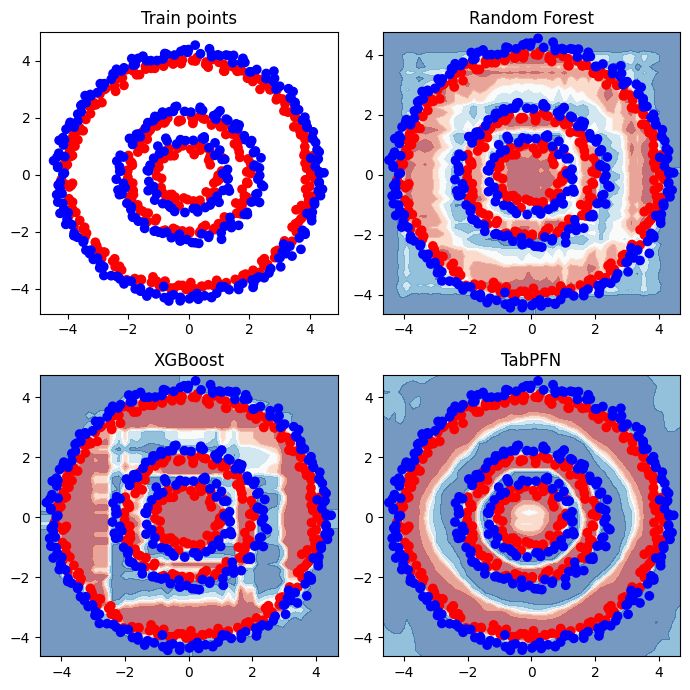

In [61]:
rf = RandomForestClassifier().fit(X_train[:, :2], y_train)
xgb = XGBClassifier().fit(X_train[:, :2], y_train)
tabpfn = TabPFNClassifier().fit(X_train[:, :2], y_train)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(7,7))

# Plot Train Points
ax_points = axes[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(["#FF0000", "#0000FF"]))

# Plot Random Forest
ax_rf = axes[0, 1]
plot_decision_boundary(ax_rf, rf, "Random Forest")

# Plot XGBoost
ax_xgb = axes[1, 0]
plot_decision_boundary(ax_xgb, xgb, "XGBoost")

# Plot TabPFN
ax_tabpfn = axes[1, 1]
plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Sin Curve Fitting with Regression

Next, we investigate the curve-fitting behavior of the different models on a sin curve.

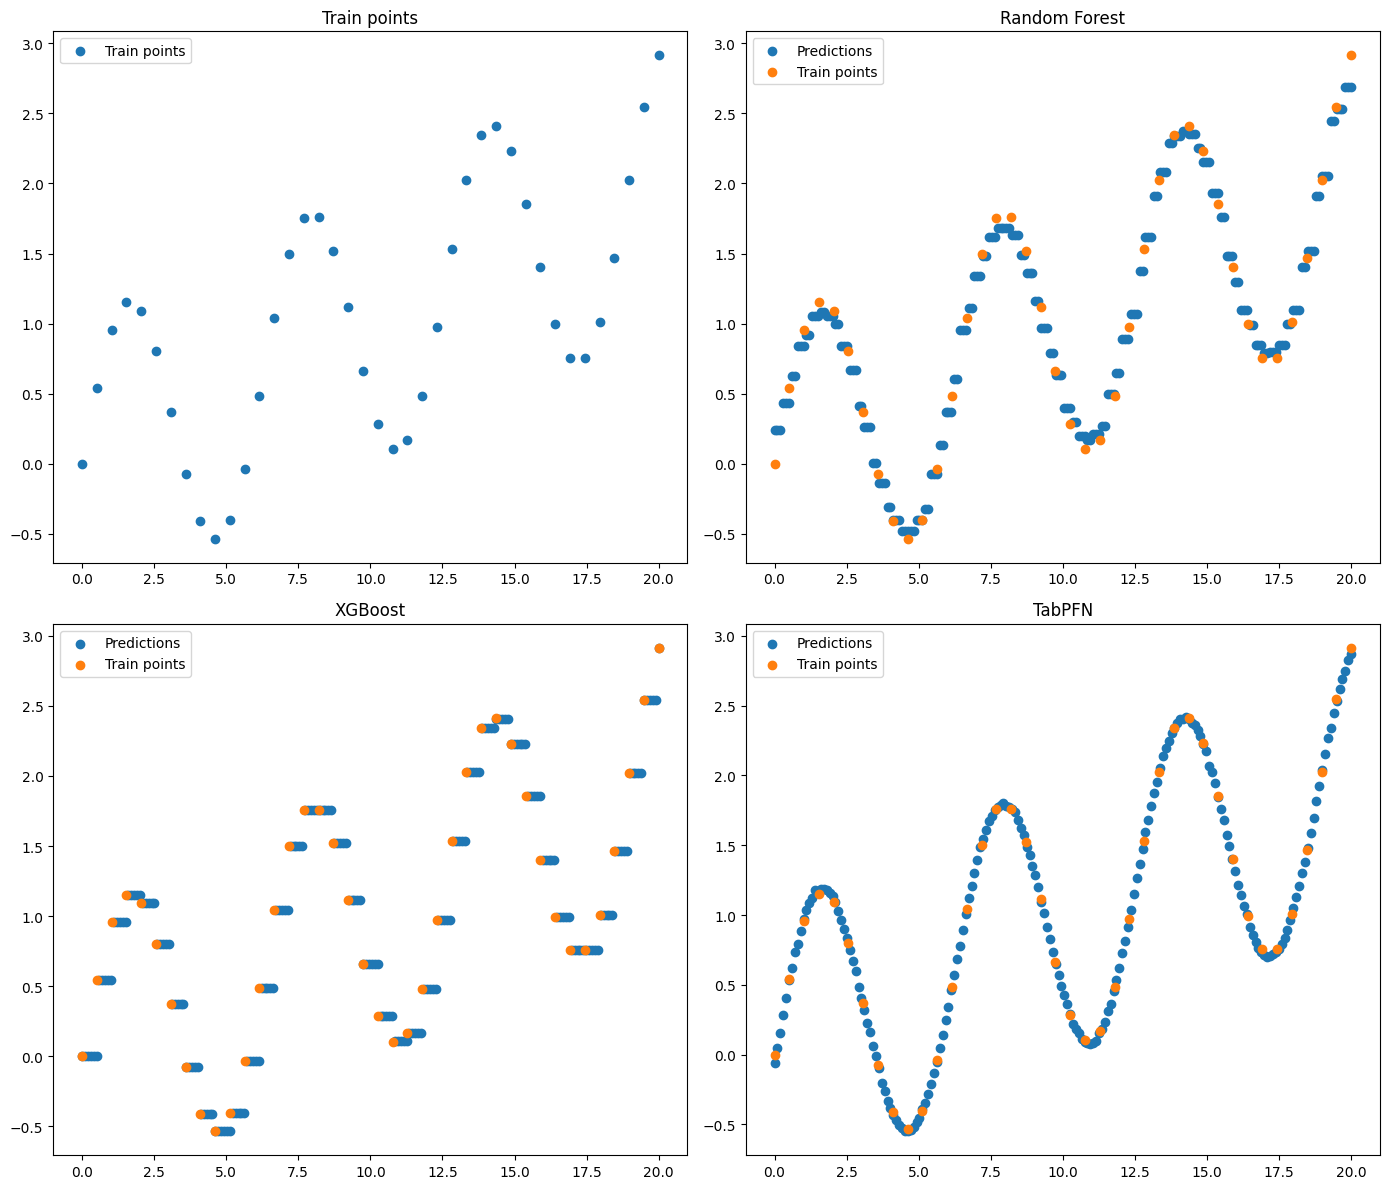

In [62]:
# Toy function to generate data
def generate_sinx_plus_x(N):
    x = np.linspace(0, 20, N)
    y = np.sin(x) + x/10

    return x.reshape(-1, 1), y

# Utility function for plotting
def plot_predictions(ax, model, model_name):
    X_test = np.linspace(0, 20, 200).reshape(-1, 1) # Predict for 200 points  between 0 and 20
    y_preds = model.predict(X_test)
    ax.set_title(model_name)
    ax.scatter(X_test, y_preds, label="Predictions")
    ax.scatter(X_train, y_train, label="Train points")
    ax.legend()

# Generate data
X_train, y_train = generate_sinx_plus_x(N=40)

# Fit Models
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
tabpfn = TabPFNRegressor()
tabpfn.fit(X_train, y_train)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot train points
ax_points = axs[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train, y_train, label="Train points")
ax_points.legend()

# Plot predictions for Random Forest
ax_rf = axs[0, 1]
plot_predictions(ax_rf, rf, "Random Forest")

# Plot predictions for XGBoost
ax_xgb = axs[1, 0]
plot_predictions(ax_xgb, xgb, "XGBoost")

# Plot predictions for TabPFN
ax_tabpfn = axs[1, 1]
plot_predictions(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Uncertainty of TabPFN / Quantile Regresison

---



TabPFN is trained to predict the distribution of the target variable and not just a single point. This is also the case for regression.

As a result, we natively obtain uncertainty for the predictions of TabPFN (without the need for a new model or repeating models for different quantiles).

In the following, we plot the uncertainty of TabPFN for a toy function with noise.

In [71]:
### Code to generate the plot (feel free to ignore)
def plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, full_preds, color_multiplier=5):
  all_quantiles = preds[f"quantiles"]
  y = np.array(all_quantiles) # shape of y: (9, number of samples)

  # Calculate the maximum and minimum values in y
  y_max = np.max(y, axis=0)
  y_min = np.min(y, axis=0)

  # Calculate the widths of each quantile bin
  quantile_bin_widths = np.diff(y, axis=0) # shape of quantile_bin_widths: (8, number of samples)

  # Normalize the bin widths for a given x
  per_x_normalized_bin_widths = (quantile_bin_widths) / (y_max - y_min)

  # Plotting
  num_bins, num_data_points = per_x_normalized_bin_widths.shape[0], per_x_normalized_bin_widths.shape[1]
  rect_width = (x_test[1] - x_test[0]).squeeze() # assuming the x query points are equally spaced out

  for i in range(num_data_points):
      for j in range(num_bins):
          rect_height = quantile_bin_widths[j, i]
          rect = plt.Rectangle(
                    xy=(x_test[i][0] - rect_width / 2, y[j, i]),
                    width=rect_width,
                    height=quantile_bin_widths[j, i],
                    facecolor=plt.cm.viridis(per_x_normalized_bin_widths[j, i] * color_multiplier),
                    edgecolor='none'
                )
          ax.add_patch(rect)

  # Set limits and labels
  ax.plot(x, y_line, label='True line', color='blue')
  ax.set_xlim(min(x_test) - 1, max(x_test) + 1)
  ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

  # ax.plot(x, y, label='True line', color='blue')
  ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)

  plt.title('TabPFN Regression Uncertainty')
  plt.show()

# Generate Data
def generate_line_with_heteroscedastic_noise(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    x = np.linspace(x_start, x_end, num_points)
    noise = np.random.randn(num_points)
    y = m * x
    y_noisy = y + (noise * noise_factor * x)

    return x.reshape(-1, 1), y, y_noisy

def generate_line_with_heteroscedastic_noise_with_gap(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    extra_points = num_points // 3
    x, y, y_noisy = generate_line_with_heteroscedastic_noise(m, num_points+extra_points, x_start, x_end, noise_factor)
    a = np.arange(num_points + extra_points)
    idx = np.where((a < num_points/3) | (a > num_points/3 + extra_points))
    return x[idx], y[idx], y_noisy[idx]

x, y_line, y_noisy = generate_line_with_heteroscedastic_noise_with_gap(0.8)
x_test = np.linspace(0, 100, 200).reshape(-1, 1)

In [72]:
reg = TabPFNRegressor()
reg.fit(x, y_noisy)
preds = reg.predict(x_test, output_type="full")

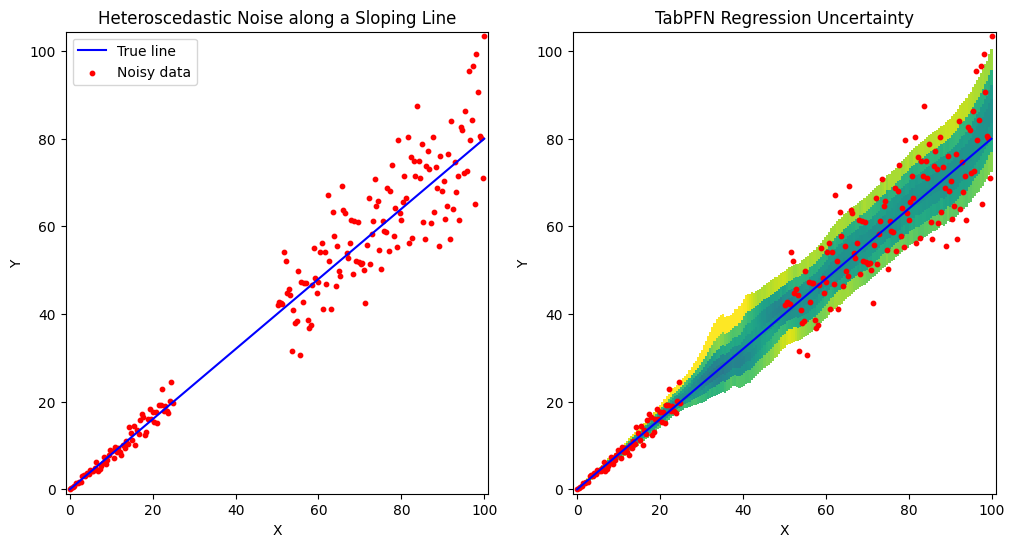

In [65]:
fig = plt.figure(figsize=(12,6))

# Plot the original data
ax = fig.add_subplot(121)
ax.plot(x, y_line, label='True line', color='blue')
ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
ax.set_title('Heteroscedastic Noise along a Sloping Line')
ax.legend()

# plot the uncertainty estimates obtained from TabPFN
ax = fig.add_subplot(122)
plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, preds, color_multiplier=5)

## BATMAN

Na na na na

na na na na

na na na na na

Batman

In [76]:
import os

# 获取当前工作目录
current_path = os.getcwd()

# 打印当前工作目录
print("当前工作路径是:", current_path)

当前工作路径是: /root


In [ ]:
# "Just run this, no questions" - Batman
!wget -nc https://github.com/PriorLabs/TabPFNDemoFiles/raw/main/thebat.npy # download a file we need

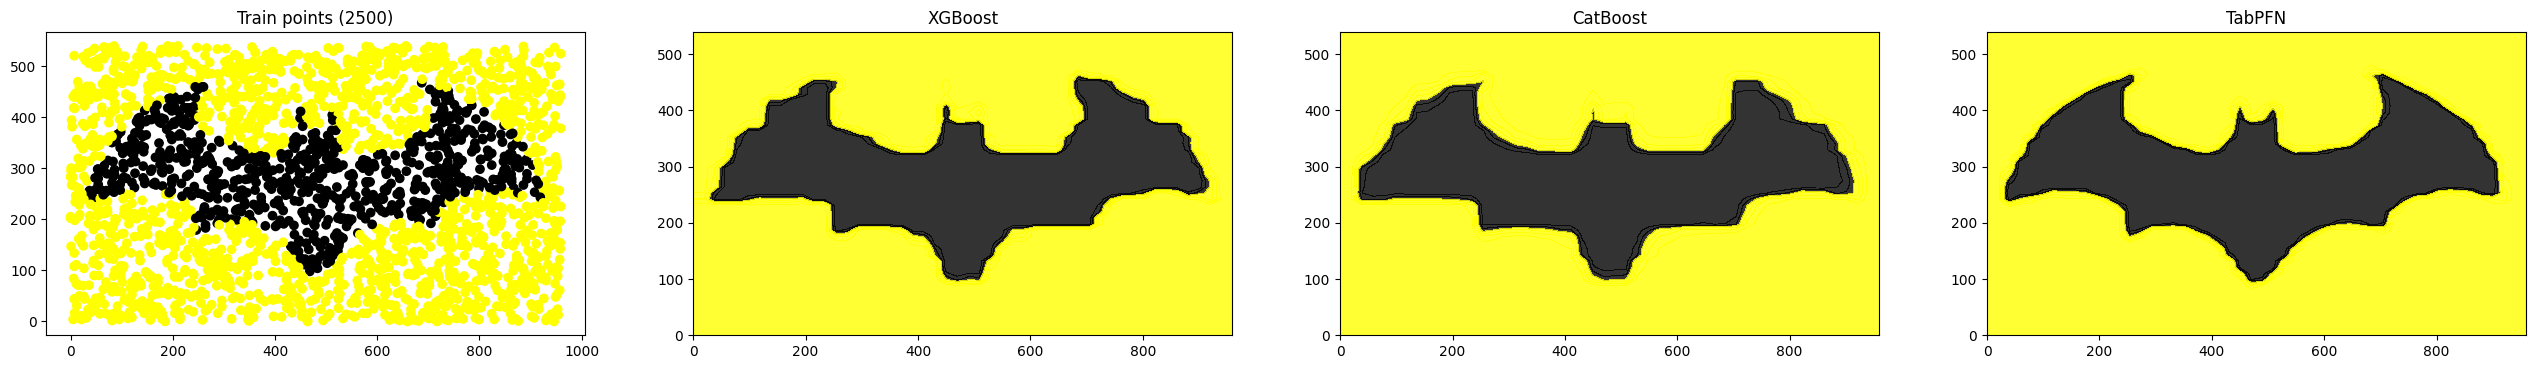

In [77]:


def sample_random_points(n, array, seed):
    np.random.seed(seed)
    x, y = np.random.randint(0, array.shape[1], (n,)), np.random.randint(0, array.shape[0], (n,))
    return np.vstack((x, y)).T, array[y, x].reshape(-1, 1).flatten()

def plot_for_all_models(n_train_points, data_source="thebat.npy", random_state=9001):
    # Load the data
    data_array = np.load(data_source)
    X_train, y_train = sample_random_points(n_train_points, data_array, random_state)

    # Fit models
    xgb = XGBClassifier(random_state=42).fit(X_train, y_train)
    catboost = CatBoostClassifier(random_state=42, verbose=0).fit(X_train, y_train)
    tabpfn = TabPFNClassifier()
    tabpfn.fit(X_train, y_train)

    ####### PLOTTING  #######
    cmap = ListedColormap(["black", "yellow"])
    def plot_decision_boundary(ax, model, model_name):
        ax.set_title(model_name)
        ax.set_aspect("equal")
        DecisionBoundaryDisplay.from_estimator(
            model, X_train, alpha=0.8, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=cmap
        )
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

    fig = plt.figure(figsize=(32,8))

    ### Plot Train Points ###
    ax_points = fig.add_subplot(141)
    ax_points.set_title(f"Train points ({n_train_points})")
    ax_points.set_aspect("equal")
    ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)

    ### Plot XGBoost ###
    ax_xgb = fig.add_subplot(142)
    plot_decision_boundary(ax_xgb, xgb, "XGBoost")

    ### Plot Random Forest ###
    ax_catboost = fig.add_subplot(143)
    plot_decision_boundary(ax_catboost, catboost, "CatBoost")

    ### Plot TabPFN ###
    ax_tabpfn = fig.add_subplot(144)
    plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

plot_for_all_models(n_train_points=2500, data_source="thebat.npy", random_state=9001)

## Random Search

In [80]:
from tabpfn_extensions.hpo import (
    TunedTabPFNRegressor,
    TunedTabPFNClassifier,
)

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = TunedTabPFNClassifier()
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Accuracy", accuracy_score(y_test, predictions))

# Multiclass
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
clf = TunedTabPFNClassifier()
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities, multi_class="ovr"))
print("Accuracy", accuracy_score(y_test, predictions))

# Regression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
reg = TunedTabPFNRegressor()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("R-squared (R^2):", r2_score(y_test, predictions))

2025-02-17 21:15:56 INFO     No categorical features specified. Using all features as numeric.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-02-17 21:15:56 INFO     build_posterior_wrapper took 0.478814 seconds
2025-02-17 21:15:56 INFO     TPE using 0 trials
/root/miniconda3/lib/python3.10/site-packages/tabpfn/base.py:88: UserWarning: Downloading model to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-gn2p4bpt.ckpt.
  model, _, config_ = load_model_criterion_config(

2025-02-17 21:15:56 INFO     Attempting HuggingFace download: tabpfn-v2-classifier-gn2p4bpt.ckpt


tabpfn-v2-classifier-gn2p4bpt.ckpt:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 21:17:04 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-gn2p4bpt.ckpt


  2%|▏         | 1/50 [01:13<1:00:04, 73.55s/trial, best loss: -0.987012987012987]

2025-02-17 21:17:10 INFO     build_posterior_wrapper took 0.114768 seconds
2025-02-17 21:17:10 INFO     TPE using 1/1 trials with best loss -0.987013


  4%|▍         | 2/50 [01:13<24:17, 30.36s/trial, best loss: -0.987012987012987]  

2025-02-17 21:17:10 INFO     build_posterior_wrapper took 0.433466 seconds
2025-02-17 21:17:10 INFO     TPE using 2/2 trials with best loss -0.987013


  6%|▌         | 3/50 [01:16<14:01, 17.90s/trial, best loss: -0.987012987012987]

2025-02-17 21:17:13 INFO     build_posterior_wrapper took 0.103654 seconds
2025-02-17 21:17:13 INFO     TPE using 3/3 trials with best loss -0.987013


  8%|▊         | 4/50 [01:16<08:20, 10.88s/trial, best loss: -0.987012987012987]

2025-02-17 21:17:13 INFO     build_posterior_wrapper took 0.095232 seconds
2025-02-17 21:17:13 INFO     TPE using 4/4 trials with best loss -0.987013


 10%|█         | 5/50 [01:16<05:14,  7.00s/trial, best loss: -0.987012987012987]

2025-02-17 21:17:13 INFO     build_posterior_wrapper took 0.400612 seconds
2025-02-17 21:17:13 INFO     TPE using 5/5 trials with best loss -0.987013
/root/miniconda3/lib/python3.10/site-packages/tabpfn/base.py:88: UserWarning: Downloading model to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(

2025-02-17 21:17:13 INFO     Attempting HuggingFace download: tabpfn-v2-classifier.ckpt


tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 21:17:49 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier.ckpt


 12%|█▏        | 6/50 [01:54<12:50, 17.52s/trial, best loss: -0.987012987012987]

2025-02-17 21:17:51 INFO     build_posterior_wrapper took 0.121345 seconds
2025-02-17 21:17:51 INFO     TPE using 6/6 trials with best loss -0.987013


 14%|█▍        | 7/50 [01:55<08:29, 11.84s/trial, best loss: -0.987012987012987]

2025-02-17 21:17:51 INFO     build_posterior_wrapper took 0.098698 seconds
2025-02-17 21:17:51 INFO     TPE using 7/7 trials with best loss -0.987013


 16%|█▌        | 8/50 [01:55<05:40,  8.11s/trial, best loss: -0.987012987012987]

2025-02-17 21:17:52 INFO     build_posterior_wrapper took 0.594309 seconds
2025-02-17 21:17:52 INFO     TPE using 8/8 trials with best loss -0.987013
/root/miniconda3/lib/python3.10/site-packages/tabpfn/base.py:88: UserWarning: Downloading model to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-znskzxi4.ckpt.
  model, _, config_ = load_model_criterion_config(

2025-02-17 21:17:52 INFO     Attempting HuggingFace download: tabpfn-v2-classifier-znskzxi4.ckpt


tabpfn-v2-classifier-znskzxi4.ckpt:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 21:17:59 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-znskzxi4.ckpt


 18%|█▊        | 9/50 [02:06<06:18,  9.24s/trial, best loss: -0.987012987012987]

2025-02-17 21:18:03 INFO     build_posterior_wrapper took 0.110614 seconds
2025-02-17 21:18:03 INFO     TPE using 9/9 trials with best loss -0.987013


 20%|██        | 10/50 [02:07<04:16,  6.42s/trial, best loss: -0.987012987012987]

2025-02-17 21:18:04 INFO     build_posterior_wrapper took 0.526832 seconds
2025-02-17 21:18:04 INFO     TPE using 10/10 trials with best loss -0.987013


 22%|██▏       | 11/50 [02:07<03:00,  4.62s/trial, best loss: -0.987012987012987]

2025-02-17 21:18:04 INFO     build_posterior_wrapper took 0.106228 seconds
2025-02-17 21:18:04 INFO     TPE using 11/11 trials with best loss -0.987013


 24%|██▍       | 12/50 [02:10<02:39,  4.19s/trial, best loss: -0.987012987012987]

2025-02-17 21:18:07 INFO     build_posterior_wrapper took 0.108538 seconds
2025-02-17 21:18:07 INFO     TPE using 12/12 trials with best loss -0.987013


 26%|██▌       | 13/50 [02:10<01:49,  2.96s/trial, best loss: -0.987012987012987]

2025-02-17 21:18:07 INFO     build_posterior_wrapper took 0.460090 seconds
2025-02-17 21:18:07 INFO     TPE using 13/13 trials with best loss -0.987013


 28%|██▊       | 14/50 [02:11<01:19,  2.21s/trial, best loss: -0.987012987012987]

2025-02-17 21:18:07 INFO     build_posterior_wrapper took 0.103646 seconds
2025-02-17 21:18:07 INFO     TPE using 14/14 trials with best loss -0.987013


 30%|███       | 15/50 [02:11<00:55,  1.58s/trial, best loss: -0.987012987012987]

2025-02-17 21:18:08 INFO     build_posterior_wrapper took 0.484600 seconds
2025-02-17 21:18:08 INFO     TPE using 15/15 trials with best loss -0.987013


 32%|███▏      | 16/50 [02:15<01:13,  2.16s/trial, best loss: -1.0]              

2025-02-17 21:18:11 INFO     build_posterior_wrapper took 0.106469 seconds
2025-02-17 21:18:11 INFO     TPE using 16/16 trials with best loss -1.000000


 34%|███▍      | 17/50 [02:19<01:37,  2.97s/trial, best loss: -1.0]

2025-02-17 21:18:16 INFO     build_posterior_wrapper took 0.127390 seconds
2025-02-17 21:18:16 INFO     TPE using 17/17 trials with best loss -1.000000


 36%|███▌      | 18/50 [02:22<01:36,  3.00s/trial, best loss: -1.0]

2025-02-17 21:18:19 INFO     build_posterior_wrapper took 0.551316 seconds
2025-02-17 21:18:19 INFO     TPE using 18/18 trials with best loss -1.000000
/root/miniconda3/lib/python3.10/site-packages/tabpfn/base.py:88: UserWarning: Downloading model to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-vutqq28w.ckpt.
  model, _, config_ = load_model_criterion_config(

2025-02-17 21:18:19 INFO     Attempting HuggingFace download: tabpfn-v2-classifier-vutqq28w.ckpt


tabpfn-v2-classifier-vutqq28w.ckpt:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 21:18:22 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-vutqq28w.ckpt


 38%|███▊      | 19/50 [02:28<01:54,  3.70s/trial, best loss: -1.0]

2025-02-17 21:18:24 INFO     build_posterior_wrapper took 0.109554 seconds
2025-02-17 21:18:24 INFO     TPE using 19/19 trials with best loss -1.000000


 40%|████      | 20/50 [02:28<01:18,  2.63s/trial, best loss: -1.0]

2025-02-17 21:18:24 INFO     build_posterior_wrapper took 0.106334 seconds
2025-02-17 21:18:24 INFO     TPE using 20/20 trials with best loss -1.000000


 42%|████▏     | 21/50 [02:32<01:28,  3.06s/trial, best loss: -1.0]

2025-02-17 21:18:29 INFO     build_posterior_wrapper took 0.485624 seconds
2025-02-17 21:18:29 INFO     TPE using 21/21 trials with best loss -1.000000


 44%|████▍     | 22/50 [02:35<01:28,  3.15s/trial, best loss: -1.0]

2025-02-17 21:18:32 INFO     build_posterior_wrapper took 0.108431 seconds
2025-02-17 21:18:32 INFO     TPE using 22/22 trials with best loss -1.000000


 46%|████▌     | 23/50 [02:41<01:43,  3.83s/trial, best loss: -1.0]

2025-02-17 21:18:38 INFO     build_posterior_wrapper took 0.455787 seconds
2025-02-17 21:18:38 INFO     TPE using 23/23 trials with best loss -1.000000


 48%|████▊     | 24/50 [02:44<01:31,  3.51s/trial, best loss: -1.0]

2025-02-17 21:18:40 INFO     build_posterior_wrapper took 0.114352 seconds
2025-02-17 21:18:40 INFO     TPE using 24/24 trials with best loss -1.000000


 50%|█████     | 25/50 [02:47<01:29,  3.60s/trial, best loss: -1.0]

2025-02-17 21:18:44 INFO     build_posterior_wrapper took 0.106024 seconds
2025-02-17 21:18:44 INFO     TPE using 25/25 trials with best loss -1.000000


 52%|█████▏    | 26/50 [02:50<01:17,  3.24s/trial, best loss: -1.0]

2025-02-17 21:18:47 INFO     build_posterior_wrapper took 0.431678 seconds
2025-02-17 21:18:47 INFO     TPE using 26/26 trials with best loss -1.000000


 54%|█████▍    | 27/50 [02:52<01:10,  3.06s/trial, best loss: -1.0]

2025-02-17 21:18:49 INFO     build_posterior_wrapper took 0.111396 seconds
2025-02-17 21:18:49 INFO     TPE using 27/27 trials with best loss -1.000000


 56%|█████▌    | 28/50 [02:55<01:06,  3.02s/trial, best loss: -1.0]

2025-02-17 21:18:52 INFO     build_posterior_wrapper took 0.113519 seconds
2025-02-17 21:18:52 INFO     TPE using 28/28 trials with best loss -1.000000


 58%|█████▊    | 29/50 [02:58<01:03,  3.01s/trial, best loss: -1.0]

2025-02-17 21:18:55 INFO     build_posterior_wrapper took 0.415776 seconds
2025-02-17 21:18:55 INFO     TPE using 29/29 trials with best loss -1.000000


 60%|██████    | 30/50 [03:04<01:15,  3.78s/trial, best loss: -1.0]

2025-02-17 21:19:00 INFO     build_posterior_wrapper took 0.113447 seconds
2025-02-17 21:19:00 INFO     TPE using 30/30 trials with best loss -1.000000


 62%|██████▏   | 31/50 [03:07<01:07,  3.57s/trial, best loss: -1.0]

2025-02-17 21:19:04 INFO     build_posterior_wrapper took 0.112078 seconds
2025-02-17 21:19:04 INFO     TPE using 31/31 trials with best loss -1.000000


 64%|██████▍   | 32/50 [03:10<01:01,  3.42s/trial, best loss: -1.0]

2025-02-17 21:19:07 INFO     build_posterior_wrapper took 0.517037 seconds
2025-02-17 21:19:07 INFO     TPE using 32/32 trials with best loss -1.000000


 66%|██████▌   | 33/50 [03:13<00:55,  3.26s/trial, best loss: -1.0]

2025-02-17 21:19:09 INFO     build_posterior_wrapper took 0.108933 seconds
2025-02-17 21:19:09 INFO     TPE using 33/33 trials with best loss -1.000000


 68%|██████▊   | 34/50 [03:15<00:47,  2.97s/trial, best loss: -1.0]

2025-02-17 21:19:12 INFO     build_posterior_wrapper took 0.402944 seconds
2025-02-17 21:19:12 INFO     TPE using 34/34 trials with best loss -1.000000


 70%|███████   | 35/50 [03:17<00:40,  2.73s/trial, best loss: -1.0]

2025-02-17 21:19:14 INFO     build_posterior_wrapper took 0.107294 seconds
2025-02-17 21:19:14 INFO     TPE using 35/35 trials with best loss -1.000000


 72%|███████▏  | 36/50 [03:20<00:36,  2.57s/trial, best loss: -1.0]

2025-02-17 21:19:16 INFO     build_posterior_wrapper took 0.109446 seconds
2025-02-17 21:19:16 INFO     TPE using 36/36 trials with best loss -1.000000


 74%|███████▍  | 37/50 [03:23<00:35,  2.73s/trial, best loss: -1.0]

2025-02-17 21:19:20 INFO     build_posterior_wrapper took 0.442836 seconds
2025-02-17 21:19:20 INFO     TPE using 37/37 trials with best loss -1.000000


 76%|███████▌  | 38/50 [03:25<00:32,  2.68s/trial, best loss: -1.0]

2025-02-17 21:19:22 INFO     build_posterior_wrapper took 0.107671 seconds
2025-02-17 21:19:22 INFO     TPE using 38/38 trials with best loss -1.000000


 78%|███████▊  | 39/50 [03:28<00:29,  2.67s/trial, best loss: -1.0]

2025-02-17 21:19:24 INFO     build_posterior_wrapper took 0.108776 seconds
2025-02-17 21:19:24 INFO     TPE using 39/39 trials with best loss -1.000000


 80%|████████  | 40/50 [03:30<00:25,  2.53s/trial, best loss: -1.0]

2025-02-17 21:19:27 INFO     build_posterior_wrapper took 0.456086 seconds
2025-02-17 21:19:27 INFO     TPE using 40/40 trials with best loss -1.000000


 82%|████████▏ | 41/50 [03:33<00:25,  2.79s/trial, best loss: -1.0]

2025-02-17 21:19:30 INFO     build_posterior_wrapper took 0.107661 seconds
2025-02-17 21:19:30 INFO     TPE using 41/41 trials with best loss -1.000000


 84%|████████▍ | 42/50 [03:34<00:15,  1.99s/trial, best loss: -1.0]

2025-02-17 21:19:30 INFO     build_posterior_wrapper took 0.410067 seconds
2025-02-17 21:19:30 INFO     TPE using 42/42 trials with best loss -1.000000


 86%|████████▌ | 43/50 [03:36<00:15,  2.18s/trial, best loss: -1.0]

2025-02-17 21:19:33 INFO     build_posterior_wrapper took 0.109155 seconds
2025-02-17 21:19:33 INFO     TPE using 43/43 trials with best loss -1.000000


 88%|████████▊ | 44/50 [03:36<00:09,  1.57s/trial, best loss: -1.0]

2025-02-17 21:19:33 INFO     build_posterior_wrapper took 0.096950 seconds
2025-02-17 21:19:33 INFO     TPE using 44/44 trials with best loss -1.000000


 90%|█████████ | 45/50 [03:39<00:09,  1.96s/trial, best loss: -1.0]

2025-02-17 21:19:36 INFO     build_posterior_wrapper took 0.405137 seconds
2025-02-17 21:19:36 INFO     TPE using 45/45 trials with best loss -1.000000


 92%|█████████▏| 46/50 [03:40<00:06,  1.50s/trial, best loss: -1.0]

2025-02-17 21:19:36 INFO     build_posterior_wrapper took 0.095958 seconds
2025-02-17 21:19:36 INFO     TPE using 46/46 trials with best loss -1.000000


 94%|█████████▍| 47/50 [03:42<00:05,  1.75s/trial, best loss: -1.0]

2025-02-17 21:19:39 INFO     build_posterior_wrapper took 0.105413 seconds
2025-02-17 21:19:39 INFO     TPE using 47/47 trials with best loss -1.000000


 96%|█████████▌| 48/50 [03:42<00:02,  1.26s/trial, best loss: -1.0]

2025-02-17 21:19:39 INFO     build_posterior_wrapper took 0.401737 seconds
2025-02-17 21:19:39 INFO     TPE using 48/48 trials with best loss -1.000000


 98%|█████████▊| 49/50 [03:45<00:01,  1.79s/trial, best loss: -1.0]

2025-02-17 21:19:42 INFO     build_posterior_wrapper took 0.104734 seconds
2025-02-17 21:19:42 INFO     TPE using 49/49 trials with best loss -1.000000


100%|██████████| 50/50 [03:48<00:00,  4.57s/trial, best loss: -1.0]


2025-02-17 21:19:48 INFO     No categorical features specified. Using all features as numeric.


ROC AUC: 0.9965461946466017
Accuracy 0.973404255319149
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-02-17 21:19:49 INFO     build_posterior_wrapper took 0.106396 seconds
2025-02-17 21:19:49 INFO     TPE using 0 trials


  2%|▏         | 1/50 [00:01<00:53,  1.09s/trial, best loss: -0.95]

2025-02-17 21:19:50 INFO     build_posterior_wrapper took 0.110686 seconds
2025-02-17 21:19:50 INFO     TPE using 1/1 trials with best loss -0.950000


  4%|▍         | 2/50 [00:01<00:25,  1.91trial/s, best loss: -0.95]

2025-02-17 21:19:50 INFO     build_posterior_wrapper took 0.418762 seconds
2025-02-17 21:19:50 INFO     TPE using 2/2 trials with best loss -0.950000


  6%|▌         | 3/50 [00:02<00:35,  1.34trial/s, best loss: -0.95]

2025-02-17 21:19:51 INFO     build_posterior_wrapper took 0.107728 seconds
2025-02-17 21:19:51 INFO     TPE using 3/3 trials with best loss -0.950000


  8%|▊         | 4/50 [00:03<00:34,  1.32trial/s, best loss: -0.95]

2025-02-17 21:19:52 INFO     build_posterior_wrapper took 0.422575 seconds
2025-02-17 21:19:52 INFO     TPE using 4/4 trials with best loss -0.950000


 10%|█         | 5/50 [00:03<00:28,  1.56trial/s, best loss: -0.95]

2025-02-17 21:19:52 INFO     build_posterior_wrapper took 0.099091 seconds
2025-02-17 21:19:52 INFO     TPE using 5/5 trials with best loss -0.950000


 12%|█▏        | 6/50 [00:04<00:28,  1.53trial/s, best loss: -1.0] 

2025-02-17 21:19:53 INFO     build_posterior_wrapper took 0.108124 seconds
2025-02-17 21:19:53 INFO     TPE using 6/6 trials with best loss -1.000000


 14%|█▍        | 7/50 [00:05<00:31,  1.37trial/s, best loss: -1.0]

2025-02-17 21:19:54 INFO     build_posterior_wrapper took 0.383006 seconds
2025-02-17 21:19:54 INFO     TPE using 7/7 trials with best loss -1.000000


 16%|█▌        | 8/50 [00:05<00:26,  1.60trial/s, best loss: -1.0]

2025-02-17 21:19:54 INFO     build_posterior_wrapper took 0.098333 seconds
2025-02-17 21:19:54 INFO     TPE using 8/8 trials with best loss -1.000000


 18%|█▊        | 9/50 [00:06<00:26,  1.56trial/s, best loss: -1.0]

2025-02-17 21:19:55 INFO     build_posterior_wrapper took 0.389424 seconds
2025-02-17 21:19:55 INFO     TPE using 9/9 trials with best loss -1.000000


 20%|██        | 10/50 [00:06<00:22,  1.76trial/s, best loss: -1.0]

2025-02-17 21:19:55 INFO     build_posterior_wrapper took 0.101748 seconds
2025-02-17 21:19:55 INFO     TPE using 10/10 trials with best loss -1.000000


 22%|██▏       | 11/50 [00:07<00:26,  1.49trial/s, best loss: -1.0]

2025-02-17 21:19:56 INFO     build_posterior_wrapper took 0.107995 seconds
2025-02-17 21:19:56 INFO     TPE using 11/11 trials with best loss -1.000000


 24%|██▍       | 12/50 [00:08<00:25,  1.49trial/s, best loss: -1.0]

2025-02-17 21:19:57 INFO     build_posterior_wrapper took 0.391498 seconds
2025-02-17 21:19:57 INFO     TPE using 12/12 trials with best loss -1.000000


 26%|██▌       | 13/50 [00:09<00:32,  1.12trial/s, best loss: -1.0]

2025-02-17 21:19:58 INFO     build_posterior_wrapper took 0.107186 seconds
2025-02-17 21:19:58 INFO     TPE using 13/13 trials with best loss -1.000000


 28%|██▊       | 14/50 [00:09<00:23,  1.52trial/s, best loss: -1.0]

2025-02-17 21:19:58 INFO     build_posterior_wrapper took 0.098537 seconds
2025-02-17 21:19:58 INFO     TPE using 14/14 trials with best loss -1.000000


 30%|███       | 15/50 [00:10<00:22,  1.53trial/s, best loss: -1.0]

2025-02-17 21:19:59 INFO     build_posterior_wrapper took 0.399199 seconds
2025-02-17 21:19:59 INFO     TPE using 15/15 trials with best loss -1.000000


 32%|███▏      | 16/50 [00:10<00:19,  1.72trial/s, best loss: -1.0]

2025-02-17 21:19:59 INFO     build_posterior_wrapper took 0.098551 seconds
2025-02-17 21:19:59 INFO     TPE using 16/16 trials with best loss -1.000000


 34%|███▍      | 17/50 [00:10<00:14,  2.27trial/s, best loss: -1.0]

2025-02-17 21:19:59 INFO     build_posterior_wrapper took 0.099579 seconds
2025-02-17 21:19:59 INFO     TPE using 17/17 trials with best loss -1.000000


 36%|███▌      | 18/50 [00:11<00:13,  2.36trial/s, best loss: -1.0]

2025-02-17 21:20:00 INFO     build_posterior_wrapper took 0.103842 seconds
2025-02-17 21:20:00 INFO     TPE using 18/18 trials with best loss -1.000000


 38%|███▊      | 19/50 [00:11<00:10,  3.01trial/s, best loss: -1.0]

2025-02-17 21:20:00 INFO     build_posterior_wrapper took 0.098489 seconds
2025-02-17 21:20:00 INFO     TPE using 19/19 trials with best loss -1.000000


 40%|████      | 20/50 [00:11<00:07,  3.76trial/s, best loss: -1.0]

2025-02-17 21:20:00 INFO     build_posterior_wrapper took 0.379668 seconds
2025-02-17 21:20:00 INFO     TPE using 20/20 trials with best loss -1.000000


 42%|████▏     | 21/50 [00:12<00:13,  2.11trial/s, best loss: -1.0]

2025-02-17 21:20:01 INFO     build_posterior_wrapper took 0.112649 seconds
2025-02-17 21:20:01 INFO     TPE using 21/21 trials with best loss -1.000000


 44%|████▍     | 22/50 [00:13<00:15,  1.85trial/s, best loss: -1.0]

2025-02-17 21:20:02 INFO     build_posterior_wrapper took 0.111725 seconds
2025-02-17 21:20:02 INFO     TPE using 22/22 trials with best loss -1.000000


 46%|████▌     | 23/50 [00:13<00:15,  1.70trial/s, best loss: -1.0]

2025-02-17 21:20:03 INFO     build_posterior_wrapper took 0.409911 seconds
2025-02-17 21:20:03 INFO     TPE using 23/23 trials with best loss -1.000000


 48%|████▊     | 24/50 [00:14<00:17,  1.47trial/s, best loss: -1.0]

2025-02-17 21:20:03 INFO     build_posterior_wrapper took 0.109035 seconds
2025-02-17 21:20:03 INFO     TPE using 24/24 trials with best loss -1.000000


 50%|█████     | 25/50 [00:15<00:16,  1.49trial/s, best loss: -1.0]

2025-02-17 21:20:04 INFO     build_posterior_wrapper took 0.417628 seconds
2025-02-17 21:20:04 INFO     TPE using 25/25 trials with best loss -1.000000


 52%|█████▏    | 26/50 [00:16<00:17,  1.35trial/s, best loss: -1.0]

2025-02-17 21:20:05 INFO     build_posterior_wrapper took 0.107146 seconds
2025-02-17 21:20:05 INFO     TPE using 26/26 trials with best loss -1.000000


 54%|█████▍    | 27/50 [00:16<00:16,  1.38trial/s, best loss: -1.0]

2025-02-17 21:20:05 INFO     build_posterior_wrapper took 0.109554 seconds
2025-02-17 21:20:05 INFO     TPE using 27/27 trials with best loss -1.000000


 56%|█████▌    | 28/50 [00:17<00:15,  1.41trial/s, best loss: -1.0]

2025-02-17 21:20:06 INFO     build_posterior_wrapper took 0.398170 seconds
2025-02-17 21:20:06 INFO     TPE using 28/28 trials with best loss -1.000000


 58%|█████▊    | 29/50 [00:18<00:16,  1.31trial/s, best loss: -1.0]

2025-02-17 21:20:07 INFO     build_posterior_wrapper took 0.106704 seconds
2025-02-17 21:20:07 INFO     TPE using 29/29 trials with best loss -1.000000


 60%|██████    | 30/50 [00:19<00:14,  1.36trial/s, best loss: -1.0]

2025-02-17 21:20:08 INFO     build_posterior_wrapper took 0.108486 seconds
2025-02-17 21:20:08 INFO     TPE using 30/30 trials with best loss -1.000000


 62%|██████▏   | 31/50 [00:19<00:13,  1.39trial/s, best loss: -1.0]

2025-02-17 21:20:09 INFO     build_posterior_wrapper took 0.398675 seconds
2025-02-17 21:20:09 INFO     TPE using 31/31 trials with best loss -1.000000


 64%|██████▍   | 32/50 [00:20<00:13,  1.30trial/s, best loss: -1.0]

2025-02-17 21:20:09 INFO     build_posterior_wrapper took 0.105893 seconds
2025-02-17 21:20:09 INFO     TPE using 32/32 trials with best loss -1.000000


 66%|██████▌   | 33/50 [00:21<00:12,  1.40trial/s, best loss: -1.0]

2025-02-17 21:20:10 INFO     build_posterior_wrapper took 0.107756 seconds
2025-02-17 21:20:10 INFO     TPE using 33/33 trials with best loss -1.000000


 68%|██████▊   | 34/50 [00:22<00:11,  1.34trial/s, best loss: -1.0]

2025-02-17 21:20:11 INFO     build_posterior_wrapper took 0.395245 seconds
2025-02-17 21:20:11 INFO     TPE using 34/34 trials with best loss -1.000000


 70%|███████   | 35/50 [00:22<00:11,  1.28trial/s, best loss: -1.0]

2025-02-17 21:20:11 INFO     build_posterior_wrapper took 0.106995 seconds
2025-02-17 21:20:11 INFO     TPE using 35/35 trials with best loss -1.000000


 72%|███████▏  | 36/50 [00:23<00:10,  1.34trial/s, best loss: -1.0]

2025-02-17 21:20:12 INFO     build_posterior_wrapper took 0.426310 seconds
2025-02-17 21:20:12 INFO     TPE using 36/36 trials with best loss -1.000000


 74%|███████▍  | 37/50 [00:25<00:12,  1.04trial/s, best loss: -1.0]

2025-02-17 21:20:14 INFO     build_posterior_wrapper took 0.115872 seconds
2025-02-17 21:20:14 INFO     TPE using 37/37 trials with best loss -1.000000


 76%|███████▌  | 38/50 [00:25<00:10,  1.18trial/s, best loss: -1.0]

2025-02-17 21:20:14 INFO     build_posterior_wrapper took 0.109050 seconds
2025-02-17 21:20:14 INFO     TPE using 38/38 trials with best loss -1.000000


 78%|███████▊  | 39/50 [00:26<00:08,  1.28trial/s, best loss: -1.0]

2025-02-17 21:20:15 INFO     build_posterior_wrapper took 0.444211 seconds
2025-02-17 21:20:15 INFO     TPE using 39/39 trials with best loss -1.000000


 80%|████████  | 40/50 [00:27<00:09,  1.10trial/s, best loss: -1.0]

2025-02-17 21:20:16 INFO     build_posterior_wrapper took 0.117748 seconds
2025-02-17 21:20:16 INFO     TPE using 40/40 trials with best loss -1.000000


 82%|████████▏ | 41/50 [00:28<00:07,  1.18trial/s, best loss: -1.0]

2025-02-17 21:20:17 INFO     build_posterior_wrapper took 0.111462 seconds
2025-02-17 21:20:17 INFO     TPE using 41/41 trials with best loss -1.000000


 84%|████████▍ | 42/50 [00:28<00:05,  1.58trial/s, best loss: -1.0]

2025-02-17 21:20:17 INFO     build_posterior_wrapper took 0.476518 seconds
2025-02-17 21:20:17 INFO     TPE using 42/42 trials with best loss -1.000000


 86%|████████▌ | 43/50 [00:29<00:05,  1.21trial/s, best loss: -1.0]

2025-02-17 21:20:18 INFO     build_posterior_wrapper took 0.116473 seconds
2025-02-17 21:20:18 INFO     TPE using 43/43 trials with best loss -1.000000


 88%|████████▊ | 44/50 [00:30<00:04,  1.27trial/s, best loss: -1.0]

2025-02-17 21:20:19 INFO     build_posterior_wrapper took 0.109623 seconds
2025-02-17 21:20:19 INFO     TPE using 44/44 trials with best loss -1.000000


 90%|█████████ | 45/50 [00:30<00:02,  1.69trial/s, best loss: -1.0]

2025-02-17 21:20:19 INFO     build_posterior_wrapper took 0.474778 seconds
2025-02-17 21:20:19 INFO     TPE using 45/45 trials with best loss -1.000000


 92%|█████████▏| 46/50 [00:31<00:02,  1.42trial/s, best loss: -1.0]

2025-02-17 21:20:20 INFO     build_posterior_wrapper took 0.113142 seconds
2025-02-17 21:20:20 INFO     TPE using 46/46 trials with best loss -1.000000


 94%|█████████▍| 47/50 [00:31<00:01,  1.88trial/s, best loss: -1.0]

2025-02-17 21:20:20 INFO     build_posterior_wrapper took 0.106010 seconds
2025-02-17 21:20:20 INFO     TPE using 47/47 trials with best loss -1.000000


 96%|█████████▌| 48/50 [00:32<00:01,  1.74trial/s, best loss: -1.0]

2025-02-17 21:20:21 INFO     build_posterior_wrapper took 0.458404 seconds
2025-02-17 21:20:21 INFO     TPE using 48/48 trials with best loss -1.000000


 98%|█████████▊| 49/50 [00:32<00:00,  1.83trial/s, best loss: -1.0]

2025-02-17 21:20:21 INFO     build_posterior_wrapper took 0.101039 seconds
2025-02-17 21:20:21 INFO     TPE using 49/49 trials with best loss -1.000000


100%|██████████| 50/50 [00:33<00:00,  1.51trial/s, best loss: -1.0]


2025-02-17 21:20:22 INFO     No categorical features specified. Using all features as numeric.


ROC AUC: 0.99875233426704
Accuracy 0.98
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-02-17 21:20:23 INFO     build_posterior_wrapper took 0.111149 seconds
2025-02-17 21:20:23 INFO     TPE using 0 trials
2025-02-17 21:20:25 WARNING  Trial failed with error: local variable 'score' referenced before assignment


  2%|▏         | 1/50 [00:01<01:27,  1.78s/trial, best loss: inf]

2025-02-17 21:20:25 INFO     build_posterior_wrapper took 0.472962 seconds
2025-02-17 21:20:25 INFO     TPE using 1/1 trials with best loss inf
/root/miniconda3/lib/python3.10/site-packages/tabpfn/base.py:100: UserWarning: Downloading model to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-wyl4o83o.ckpt.
  model, bardist, config_ = load_model_criterion_config(

2025-02-17 21:20:25 INFO     Attempting HuggingFace download: tabpfn-v2-regressor-wyl4o83o.ckpt


tabpfn-v2-regressor-wyl4o83o.ckpt:   0%|          | 0.00/23.2M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 21:20:35 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-wyl4o83o.ckpt
2025-02-17 21:20:36 WARNING  Trial failed with error: local variable 'score' referenced before assignment


  4%|▍         | 2/50 [00:13<05:55,  7.40s/trial, best loss: inf]

2025-02-17 21:20:36 INFO     build_posterior_wrapper took 0.127408 seconds
2025-02-17 21:20:36 INFO     TPE using 2/2 trials with best loss inf
/root/miniconda3/lib/python3.10/site-packages/tabpfn/base.py:100: UserWarning: Downloading model to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-5wof9ojf.ckpt.
  model, bardist, config_ = load_model_criterion_config(

2025-02-17 21:20:36 INFO     Attempting HuggingFace download: tabpfn-v2-regressor-5wof9ojf.ckpt


tabpfn-v2-regressor-5wof9ojf.ckpt:   0%|          | 0.00/24.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 21:20:42 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-5wof9ojf.ckpt
2025-02-17 21:20:45 WARNING  Trial failed with error: local variable 'score' referenced before assignment


  6%|▌         | 3/50 [00:22<06:20,  8.09s/trial, best loss: inf]

2025-02-17 21:20:45 INFO     build_posterior_wrapper took 0.106620 seconds
2025-02-17 21:20:45 INFO     TPE using 3/3 trials with best loss inf


  8%|▊         | 4/50 [00:22<03:47,  4.95s/trial, best loss: inf]

2025-02-17 21:20:45 INFO     build_posterior_wrapper took 0.369474 seconds
2025-02-17 21:20:45 INFO     TPE using 4/4 trials with best loss inf


 10%|█         | 5/50 [00:22<02:28,  3.30s/trial, best loss: inf]

2025-02-17 21:20:45 INFO     build_posterior_wrapper took 0.097926 seconds
2025-02-17 21:20:45 INFO     TPE using 5/5 trials with best loss inf


 12%|█▏        | 6/50 [00:22<01:37,  2.22s/trial, best loss: inf]

2025-02-17 21:20:46 INFO     build_posterior_wrapper took 0.096217 seconds
2025-02-17 21:20:46 INFO     TPE using 6/6 trials with best loss inf


 14%|█▍        | 7/50 [00:22<01:05,  1.53s/trial, best loss: inf]

2025-02-17 21:20:46 INFO     build_posterior_wrapper took 0.356267 seconds
2025-02-17 21:20:46 INFO     TPE using 7/7 trials with best loss inf


 16%|█▌        | 8/50 [00:23<00:48,  1.16s/trial, best loss: inf]

2025-02-17 21:20:46 INFO     build_posterior_wrapper took 0.097489 seconds
2025-02-17 21:20:46 INFO     TPE using 8/8 trials with best loss inf


 18%|█▊        | 9/50 [00:23<00:34,  1.20trial/s, best loss: inf]

2025-02-17 21:20:46 INFO     build_posterior_wrapper took 0.374671 seconds
2025-02-17 21:20:46 INFO     TPE using 9/9 trials with best loss inf


 20%|██        | 10/50 [00:23<00:27,  1.44trial/s, best loss: inf]

2025-02-17 21:20:46 INFO     build_posterior_wrapper took 0.099512 seconds
2025-02-17 21:20:46 INFO     TPE using 10/10 trials with best loss inf


 22%|██▏       | 11/50 [00:23<00:20,  1.94trial/s, best loss: inf]

2025-02-17 21:20:47 INFO     build_posterior_wrapper took 0.096426 seconds
2025-02-17 21:20:47 INFO     TPE using 11/11 trials with best loss inf


 24%|██▍       | 12/50 [00:23<00:14,  2.55trial/s, best loss: inf]

2025-02-17 21:20:47 INFO     build_posterior_wrapper took 0.364021 seconds
2025-02-17 21:20:47 INFO     TPE using 12/12 trials with best loss inf
2025-02-17 21:20:49 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 26%|██▌       | 13/50 [00:26<00:38,  1.05s/trial, best loss: inf]

2025-02-17 21:20:49 INFO     build_posterior_wrapper took 0.106966 seconds
2025-02-17 21:20:49 INFO     TPE using 13/13 trials with best loss inf
/root/miniconda3/lib/python3.10/site-packages/tabpfn/base.py:100: UserWarning: Downloading model to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-09gpqh39.ckpt.
  model, bardist, config_ = load_model_criterion_config(

2025-02-17 21:20:49 INFO     Attempting HuggingFace download: tabpfn-v2-regressor-09gpqh39.ckpt


tabpfn-v2-regressor-09gpqh39.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-17 21:20:59 INFO     Successfully downloaded to /root/tabpfn-community/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor-09gpqh39.ckpt
2025-02-17 21:21:02 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 28%|██▊       | 14/50 [00:39<02:45,  4.60s/trial, best loss: inf]

2025-02-17 21:21:02 INFO     build_posterior_wrapper took 0.119787 seconds
2025-02-17 21:21:02 INFO     TPE using 14/14 trials with best loss inf
2025-02-17 21:21:03 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 30%|███       | 15/50 [00:40<02:06,  3.62s/trial, best loss: inf]

2025-02-17 21:21:04 INFO     build_posterior_wrapper took 0.473588 seconds
2025-02-17 21:21:04 INFO     TPE using 15/15 trials with best loss inf
2025-02-17 21:21:07 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 32%|███▏      | 16/50 [00:44<02:04,  3.66s/trial, best loss: inf]

2025-02-17 21:21:07 INFO     build_posterior_wrapper took 0.111771 seconds
2025-02-17 21:21:07 INFO     TPE using 16/16 trials with best loss inf
2025-02-17 21:21:11 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 34%|███▍      | 17/50 [00:47<02:00,  3.64s/trial, best loss: inf]

2025-02-17 21:21:11 INFO     build_posterior_wrapper took 0.459425 seconds
2025-02-17 21:21:11 INFO     TPE using 17/17 trials with best loss inf


 36%|███▌      | 18/50 [00:48<01:25,  2.69s/trial, best loss: inf]

2025-02-17 21:21:11 INFO     build_posterior_wrapper took 0.108767 seconds
2025-02-17 21:21:11 INFO     TPE using 18/18 trials with best loss inf
2025-02-17 21:21:13 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 38%|███▊      | 19/50 [00:49<01:11,  2.32s/trial, best loss: inf]

2025-02-17 21:21:13 INFO     build_posterior_wrapper took 0.110886 seconds
2025-02-17 21:21:13 INFO     TPE using 19/19 trials with best loss inf
2025-02-17 21:21:16 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 40%|████      | 20/50 [00:52<01:15,  2.52s/trial, best loss: inf]

2025-02-17 21:21:16 INFO     build_posterior_wrapper took 0.420856 seconds
2025-02-17 21:21:16 INFO     TPE using 20/20 trials with best loss inf
2025-02-17 21:21:17 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 42%|████▏     | 21/50 [00:54<01:03,  2.19s/trial, best loss: inf]

2025-02-17 21:21:17 INFO     build_posterior_wrapper took 0.109760 seconds
2025-02-17 21:21:17 INFO     TPE using 21/21 trials with best loss inf
2025-02-17 21:21:18 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 44%|████▍     | 22/50 [00:55<00:52,  1.87s/trial, best loss: inf]

2025-02-17 21:21:18 INFO     build_posterior_wrapper took 0.107370 seconds
2025-02-17 21:21:18 INFO     TPE using 22/22 trials with best loss inf
2025-02-17 21:21:20 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 46%|████▌     | 23/50 [00:57<00:49,  1.82s/trial, best loss: inf]

2025-02-17 21:21:20 INFO     build_posterior_wrapper took 0.427603 seconds
2025-02-17 21:21:20 INFO     TPE using 23/23 trials with best loss inf
2025-02-17 21:21:21 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 48%|████▊     | 24/50 [00:58<00:42,  1.62s/trial, best loss: inf]

2025-02-17 21:21:21 INFO     build_posterior_wrapper took 0.114600 seconds
2025-02-17 21:21:21 INFO     TPE using 24/24 trials with best loss inf
2025-02-17 21:21:22 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 50%|█████     | 25/50 [00:59<00:38,  1.53s/trial, best loss: inf]

2025-02-17 21:21:23 INFO     build_posterior_wrapper took 0.436992 seconds
2025-02-17 21:21:23 INFO     TPE using 25/25 trials with best loss inf
2025-02-17 21:21:24 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 52%|█████▏    | 26/50 [01:01<00:37,  1.57s/trial, best loss: inf]

2025-02-17 21:21:24 INFO     build_posterior_wrapper took 0.114585 seconds
2025-02-17 21:21:24 INFO     TPE using 26/26 trials with best loss inf
2025-02-17 21:21:25 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 54%|█████▍    | 27/50 [01:02<00:30,  1.34s/trial, best loss: inf]

2025-02-17 21:21:25 INFO     build_posterior_wrapper took 0.110587 seconds
2025-02-17 21:21:25 INFO     TPE using 27/27 trials with best loss inf
2025-02-17 21:21:26 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 56%|█████▌    | 28/50 [01:03<00:30,  1.37s/trial, best loss: inf]

2025-02-17 21:21:27 INFO     build_posterior_wrapper took 0.423048 seconds
2025-02-17 21:21:27 INFO     TPE using 28/28 trials with best loss inf
2025-02-17 21:21:28 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 58%|█████▊    | 29/50 [01:04<00:28,  1.35s/trial, best loss: inf]

2025-02-17 21:21:28 INFO     build_posterior_wrapper took 0.113167 seconds
2025-02-17 21:21:28 INFO     TPE using 29/29 trials with best loss inf
2025-02-17 21:21:29 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 60%|██████    | 30/50 [01:05<00:25,  1.26s/trial, best loss: inf]

2025-02-17 21:21:29 INFO     build_posterior_wrapper took 0.110187 seconds
2025-02-17 21:21:29 INFO     TPE using 30/30 trials with best loss inf
2025-02-17 21:21:29 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 62%|██████▏   | 31/50 [01:06<00:21,  1.13s/trial, best loss: inf]

2025-02-17 21:21:30 INFO     build_posterior_wrapper took 0.392456 seconds
2025-02-17 21:21:30 INFO     TPE using 31/31 trials with best loss inf
2025-02-17 21:21:31 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 64%|██████▍   | 32/50 [01:08<00:23,  1.29s/trial, best loss: inf]

2025-02-17 21:21:31 INFO     build_posterior_wrapper took 0.108508 seconds
2025-02-17 21:21:31 INFO     TPE using 32/32 trials with best loss inf
2025-02-17 21:21:32 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 66%|██████▌   | 33/50 [01:09<00:21,  1.29s/trial, best loss: inf]

2025-02-17 21:21:33 INFO     build_posterior_wrapper took 0.408166 seconds
2025-02-17 21:21:33 INFO     TPE using 33/33 trials with best loss inf
2025-02-17 21:21:33 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 68%|██████▊   | 34/50 [01:10<00:19,  1.24s/trial, best loss: inf]

2025-02-17 21:21:34 INFO     build_posterior_wrapper took 0.110693 seconds
2025-02-17 21:21:34 INFO     TPE using 34/34 trials with best loss inf
2025-02-17 21:21:36 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 70%|███████   | 35/50 [01:13<00:24,  1.65s/trial, best loss: inf]

2025-02-17 21:21:36 INFO     build_posterior_wrapper took 0.111933 seconds
2025-02-17 21:21:36 INFO     TPE using 35/35 trials with best loss inf
2025-02-17 21:21:38 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 72%|███████▏  | 36/50 [01:14<00:22,  1.58s/trial, best loss: inf]

2025-02-17 21:21:38 INFO     build_posterior_wrapper took 0.413676 seconds
2025-02-17 21:21:38 INFO     TPE using 36/36 trials with best loss inf


 74%|███████▍  | 37/50 [01:15<00:16,  1.24s/trial, best loss: inf]

2025-02-17 21:21:38 INFO     build_posterior_wrapper took 0.105659 seconds
2025-02-17 21:21:38 INFO     TPE using 37/37 trials with best loss inf
2025-02-17 21:21:39 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 76%|███████▌  | 38/50 [01:16<00:15,  1.28s/trial, best loss: inf]

2025-02-17 21:21:39 INFO     build_posterior_wrapper took 0.110508 seconds
2025-02-17 21:21:39 INFO     TPE using 38/38 trials with best loss inf


 78%|███████▊  | 39/50 [01:16<00:10,  1.07trial/s, best loss: inf]

2025-02-17 21:21:40 INFO     build_posterior_wrapper took 0.413402 seconds
2025-02-17 21:21:40 INFO     TPE using 39/39 trials with best loss inf


 80%|████████  | 40/50 [01:17<00:07,  1.28trial/s, best loss: inf]

2025-02-17 21:21:40 INFO     build_posterior_wrapper took 0.104636 seconds
2025-02-17 21:21:40 INFO     TPE using 40/40 trials with best loss inf
2025-02-17 21:21:41 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 82%|████████▏ | 41/50 [01:18<00:07,  1.19trial/s, best loss: inf]

2025-02-17 21:21:41 INFO     build_posterior_wrapper took 0.425050 seconds
2025-02-17 21:21:41 INFO     TPE using 41/41 trials with best loss inf
2025-02-17 21:21:44 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 84%|████████▍ | 42/50 [01:20<00:11,  1.41s/trial, best loss: inf]

2025-02-17 21:21:44 INFO     build_posterior_wrapper took 0.114697 seconds
2025-02-17 21:21:44 INFO     TPE using 42/42 trials with best loss inf


 86%|████████▌ | 43/50 [01:20<00:07,  1.03s/trial, best loss: inf]

2025-02-17 21:21:44 INFO     build_posterior_wrapper took 0.110250 seconds
2025-02-17 21:21:44 INFO     TPE using 43/43 trials with best loss inf
2025-02-17 21:21:45 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 88%|████████▊ | 44/50 [01:22<00:07,  1.19s/trial, best loss: inf]

2025-02-17 21:21:46 INFO     build_posterior_wrapper took 0.454808 seconds
2025-02-17 21:21:46 INFO     TPE using 44/44 trials with best loss inf


 90%|█████████ | 45/50 [01:23<00:04,  1.03trial/s, best loss: inf]

2025-02-17 21:21:46 INFO     build_posterior_wrapper took 0.105910 seconds
2025-02-17 21:21:46 INFO     TPE using 45/45 trials with best loss inf
2025-02-17 21:21:47 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 92%|█████████▏| 46/50 [01:24<00:04,  1.04s/trial, best loss: inf]

2025-02-17 21:21:47 INFO     build_posterior_wrapper took 0.111574 seconds
2025-02-17 21:21:47 INFO     TPE using 46/46 trials with best loss inf
2025-02-17 21:21:48 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 94%|█████████▍| 47/50 [01:25<00:03,  1.13s/trial, best loss: inf]

2025-02-17 21:21:49 INFO     build_posterior_wrapper took 0.422057 seconds
2025-02-17 21:21:49 INFO     TPE using 47/47 trials with best loss inf
2025-02-17 21:21:52 WARNING  Trial failed with error: local variable 'score' referenced before assignment


 96%|█████████▌| 48/50 [01:29<00:03,  1.88s/trial, best loss: inf]

2025-02-17 21:21:52 INFO     build_posterior_wrapper took 0.108104 seconds
2025-02-17 21:21:52 INFO     TPE using 48/48 trials with best loss inf


 98%|█████████▊| 49/50 [01:29<00:01,  1.35s/trial, best loss: inf]

2025-02-17 21:21:52 INFO     build_posterior_wrapper took 0.106709 seconds
2025-02-17 21:21:52 INFO     TPE using 49/49 trials with best loss inf
2025-02-17 21:21:53 WARNING  Trial failed with error: local variable 'score' referenced before assignment


100%|██████████| 50/50 [01:30<00:00,  1.80s/trial, best loss: inf]

/root/tabpfn-community/src/tabpfn_extensions/hpo/tuned_tabpfn.py:295: UserWarning: All optimization trials failed. Creating default model.
  self._optimize(X, y, "regression")



Mean Squared Error (MSE): 2687.8404466855327
Mean Absolute Error (MAE): 40.98269527905608
R-squared (R^2): 0.5329767040915454


# Interpretability

## SHAP

In [1]:
from tabpfn_extensions import interpretability

In [5]:
help(interpretability.shap)

Help on module tabpfn_extensions.interpretability.shap in tabpfn_extensions.interpretability:

NAME
    tabpfn_extensions.interpretability.shap

DESCRIPTION
    #  Copyright (c) Prior Labs GmbH 2025.
    #  Licensed under the Apache License, Version 2.0

FUNCTIONS
    calculate_shap_subset(args)
    
    get_default_explainer(estimator, test_x, predict_function_for_shap='predict', **kwargs)
    
    get_shap_values(estimator, test_x, attribute_names=None, **kwargs) -> numpy.ndarray
        Computes SHAP (SHapley Additive exPlanations) values for the model's predictions on the given input features.
        
        Parameters:
            test_x (Union[pd.DataFrame, np.ndarray]): The input features to compute SHAP values for.
            kwargs (dict): Additional keyword arguments to pass to the SHAP explainer.
        
        Returns:
            np.ndarray: The computed SHAP values.
    
    get_tabpfn_explainer(estimator, test_x, predict_function_for_shap='predict', **kwargs)
    
 

PermutationExplainer explainer: 51it [00:57,  1.25s/it]                        

Computing shap values for the first class (index 0).


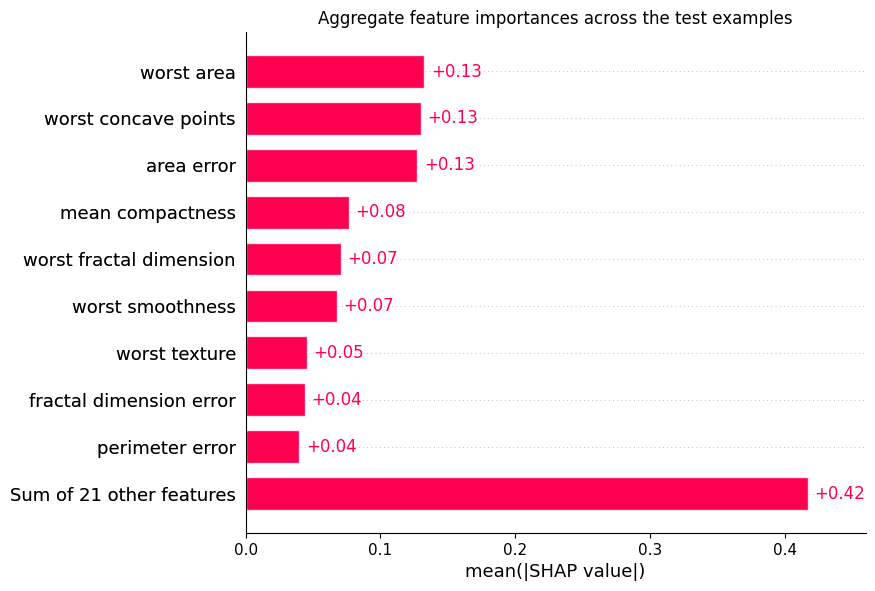

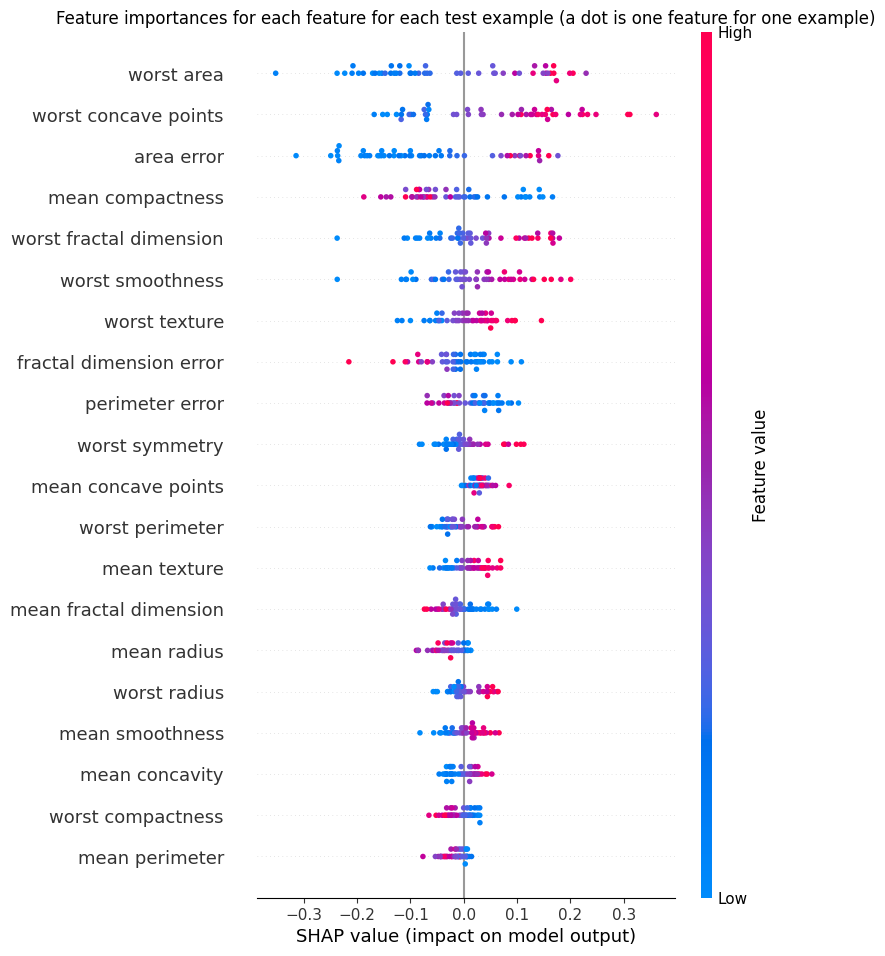

Now we analyze the strongest feature interactions of the most important feature, namely the feature "23".


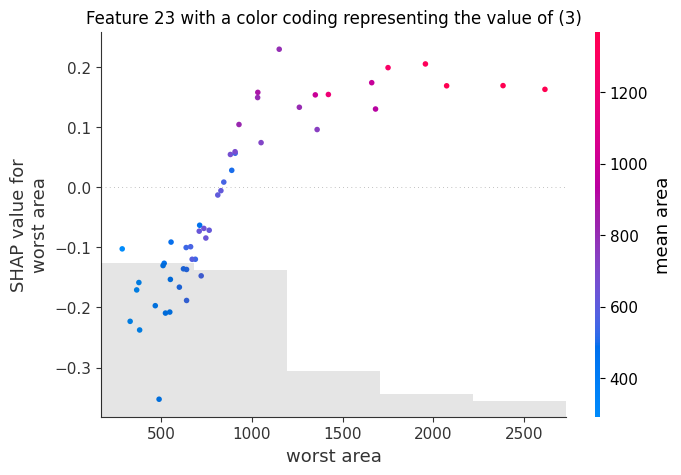

In [70]:
from tabpfn_extensions import interpretability

# Load example dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
n_samples = 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5
)

# Initialize and train model
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation",
)

# Create visualization
fig = interpretability.shap.plot_shap(shap_values)


## Feature selection

In [82]:
from tabpfn_extensions import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=3)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names
)

# Print selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if sfs.get_support()[i]]
print("\nSelected features:")
for feature in selected_features:
    print(f"- {feature}")

Score with all features: 0.9824250892718522 +/- 0.005548203116040923
Score with selected features: 0.9806862288464524 +/- 0.012879405920137468
Features selected by forward sequential selection: ['mean texture', 'mean concavity', 'worst texture', 'worst area', 'worst smoothness']

Selected features:
- mean texture
- mean concavity
- worst texture
- worst area
- worst smoothness


In [7]:
help(interpretability.feature_selection)

Help on module tabpfn_extensions.interpretability.feature_selection in tabpfn_extensions.interpretability:

NAME
    tabpfn_extensions.interpretability.feature_selection

DESCRIPTION
    #  Copyright (c) Prior Labs GmbH 2025.
    #  Licensed under the Apache License, Version 2.0

FUNCTIONS
    feature_selection(estimator, X, y, n_features_to_select=3, feature_names=None, **kwargs)

FILE
    /root/tabpfn-extensions/src/tabpfn_extensions/interpretability/feature_selection.py




# Unsupervised

## Data Generation / Outlier Detection

100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


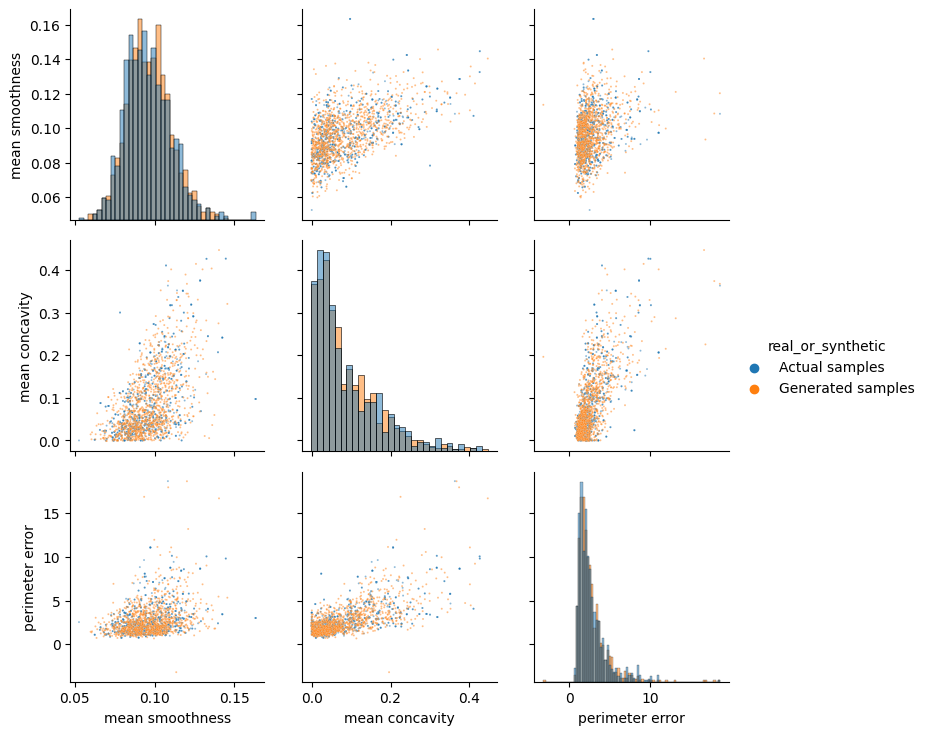

In [85]:
from tabpfn_extensions import unsupervised

# Load and prepare breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df['data'], df['target']
feature_names = df['feature_names']

# Initialize TabPFN models
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=TabPFNClassifier(),
    tabpfn_reg=TabPFNRegressor()
)

# Select features for synthetic data generation
# Example features: [mean texture, mean area, mean concavity]
feature_indices = [4, 6, 12]

# Run synthetic data generation experiment
experiment = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type='unsupervised'
)

results = experiment.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=feature_names,
    temp=1.0,  # Temperature parameter for sampling
    n_samples=X.shape[0] * 2,  # Generate twice as many samples as original data
    indices=feature_indices
)

## Outlier detection

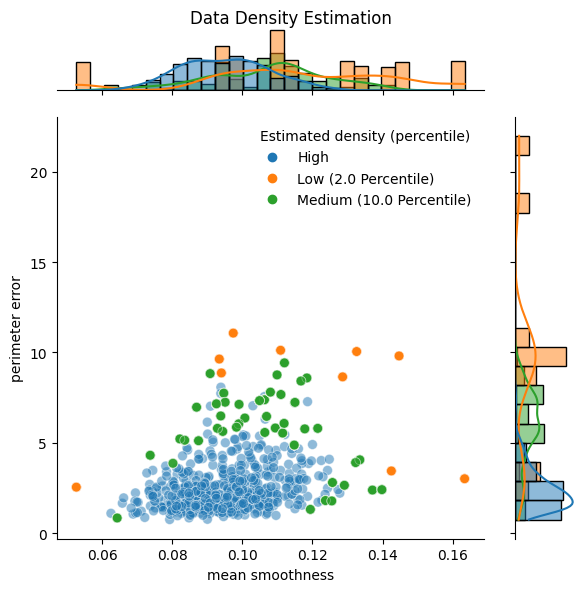

In [87]:
import torch
from sklearn.datasets import load_breast_cancer
from tabpfn_extensions import unsupervised
from tabpfn_extensions import TabPFNClassifier, TabPFNRegressor

# Load data
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Initialize models
clf = TabPFNClassifier(n_estimators=4)
reg = TabPFNRegressor(n_estimators=4)
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf, tabpfn_reg=reg
)

# Run outlier detection
exp_outlier = unsupervised.experiments.OutlierDetectionUnsupervisedExperiment(
    task_type="unsupervised"
)
results = exp_outlier.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=attribute_names,
    indices=[4, 12],  # Analyze features 4 and 12
)